<div style='text-align: center'>
<font size=15>
<b>Atherosclerotic Cardiovascular Disease (ASCVD) Understanding and Prediction</b>
</font>
</div>

# **Table of Contents**

1. Introduction
2. Data & Methodology
3. Data Understanding
4. Data Preparation
5. Exploratory Analysis
6. Modeling & Evaluation
7. Conclusion & Recommendations

# **1. Introduction**

## 1.1. Problem Statement  

Atherosclerosis is a disease that affects the walls of the arteries and can cause them to become thicker and less elastic. This condition is a leading cause of death globally, and can lead to serious health problems such as heart attacks, strokes, and damage to arteries in the legs. Risk factors for atherosclerosis include high cholesterol, diabetes, smoking, family history, being sedentary, being overweight, and high blood pressure. Symptoms are caused by a reduced or blocked blood flow due to plaque buildup, and can vary depending on the artery affected. Diagnosis is done through medical examinations like angiography or ultrasonography. Treatment includes modifying risk factors, making lifestyle changes, taking antiplatelet drugs and antiatherogenic drugs. By identifying and analyzing risk factors, we can predict the likelihood of developing ASCV disease, and take preventative measures accordingly.


<p align="center"></a>
 <img src="ascd2-1.jpg"/></a>
</p>

## 1.2. Project Objective  
This personal project aims to:
- Analyze the impact of different factors, such as age, gender, medical examination results, etc., on the development of cardiovascular disease.  

- Build a machine learning model to predict the presence or absence of cardiovascular disease using those features.

## 1.3. Executive Summary  

Our analytics report aims to help us achieve our project goals by exploring the impact of demographics, physical characteristics, health examination results, and lifestyle on the development of ASCVD. Through this analysis, we have identified critical features that increase the risk of ASCVD and built a promising machine-learning model (with an F1 Score of 0.74 and an ROC-AUC of 0.80) to predict the presence or absence of cardiovascular disease.

Our data analytic process helped us discover some significant findings that can help us take preventive measures to reduce the risk of ASCVD:

- Age, high blood pressure, high blood glucose, high cholesterol, and obesity are high-risk factors for ASCVD. When these factors combine, they increase the risk even further.
- A lifestyle with regular physical activity can help reduce the risk of having ASCVD.
- Although people who smoke and drink alcohol are not at risk of developing ASCVD, they can still increase their risk of cardiovascular disease by leading a sedentary lifestyle and continuing these bad habits.

With this information, we can take proactive steps to reduce the risk of ASCVD and improve our overall health.

# **2. Data and Methodology**

## 2.1. The Data  
The data used in this project is taken from Kaggle ([source](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)).  

There are 3 types of input features:

- *Objective*: patient's demographics;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient (lifestyle).  


| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code (1 - women, 2 - men) |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.  


## 2.2. Methodology 

Our process of analyzing data involves various methods as detailed below:  

`Data Understanding`
- Collecting the initial data from Kaggle and importing it into the DataFrame.
- Utilizing several tools and techniques to comprehend the structure, contents, and quality of the data and identify potential issues that require further investigation or correction.

`Data Preparation`
- Data cleaning: Using a data cleaning checklist to recognize and resolve any quality problems with the data, including issues with data constraints, text and categorical data, data uniformity, and missing data.
- Data transformation: Modifying and creating new variables from existing data to make it more appropriate for our analysis objectives.
- Data validation: Verifying and validating the data after cleaning and transforming.

`Exploratory Analysis`
- Conducting data analysis, statistical tests and visualizing data to discover insights.
- Our exploratory data analysis includes univariate, bivariate, and multivariate analysis tasks.

`Modeling & Evaluation`
- Building a machine learning model on the training dataset with the identified findings.
- Evaluating the trained model on the unseen dataset with fine-tuning parameters.


## 2.3. Importing Libraries

To make our data analysis, visualization, and modeling more efficient, we have developed some user-defined function modules. To use them, please ensure that the module files are copied to the same directory as this notebook.

### (+) Libraries

In [1]:

# Pandas
import pandas as pd
pd.set_option("display.max_columns", None)

# Numpy and others
import os, sys, glob, re, math
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import sklearn.tree as skltr
import sklearn.ensemble as sklen
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import sklearn.metrics as sklme

### (+) User-defined Modules

In [2]:

sys.path.append("d:\\OneDrive\\1_DA-DS\\2_PROJECT\\1_MY_MODULES")
# Functions for data analysis
import dshfunc as hfc
# Functions for visualization
import dshplot as hpt
# Function for modeling and evaluation
import dshfpML as hml

# **3. Data Understanding**

## 3.1. Data Collection

### (+) Reading the CSV file into DataFrame

In [3]:

# Create the path to the data file
data_path = hfc.my_folder_path("1_data", folder_for_path="1_raw", print_list=False)

# Read csv file into DataFrame
ascvd0 = hfc.my_read_csv(
    data_path,
    "cardio_train.csv",
    seps=",",
    na_vals=["?", "."],
    index_col=None,
    parse_dates=None,
    dtype=None,
    header_row="infer",
    col_name=None,
    clean_col_name=False,
    print_info=True,
    low_memory=False,
    strip_str_val=False
)
ascvd0.sample(5)


Current folder of this notebook: 
d:/OneDrive/1_DA-DS/2_PROJECT/ASCVD/3_notebooks


Your data path is: 
 d:/OneDrive/1_DA-DS/2_PROJECT/ASCVD/1_data/1_raw/

DataFrame information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  bool   
 10  alco         70000 non-null  bool   
 11  active       70000 non-null  bool   
 12  cardio       70000 non-null  bool   
dtypes: bool(4), float64(1), int64(8)
memory usage: 5.1 MB
None

Execution time:

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
62829,89720,21872,1,158,74.0,120,80,1,1,False,False,True,True
22832,32610,21253,2,172,95.0,140,90,2,2,False,False,True,False
33716,48158,22047,1,152,45.0,120,80,1,1,False,False,False,False
8667,12370,20436,1,162,68.0,140,90,1,1,False,False,True,False
60156,85890,20566,1,165,56.0,120,80,1,1,True,False,False,False


### (+) Remarks on the data  
The data contains 70000 rows and 13 columns, with no missing values.  
- The naming format of all columns is snake-case style. 
- Most columns are numeric dtype columns, while four columns have bool dtype.  

## 3.2. Data Profiling

In this step, we collect basic informations about the data, such as the data types, category of the variables, variable statistics, and variable distribution.

### (+) Type of Variable

In [4]:

t=['Numerical, Discrete Data', 'Numerical, Discrete Data', 'Categorical, Nominal Data', 'Numerical, Continuous Data', 'Numerical, Continuous Data', 'Numerical, Continuous Data', 'Numerical, Continuous Data', 'Categorical, Ordinal Data', 'Categorical, Ordinal Data', 'Categorical, Nominal Data', 'Categorical, Nominal Data', 'Categorical, Nominal Data', 'Categorical, Nominal Data (Label)']
hfc.my_type_of_variable(ascvd0,t)

,Column,Dtype,Type of Variable
0,id,int64,"Numerical, Discrete Data"
1,age,int64,"Numerical, Discrete Data"
2,gender,int64,"Categorical, Nominal Data"
3,height,int64,"Numerical, Continuous Data"
4,weight,float64,"Numerical, Continuous Data"
5,ap_hi,int64,"Numerical, Continuous Data"
6,ap_lo,int64,"Numerical, Continuous Data"
7,cholesterol,int64,"Categorical, Ordinal Data"
8,gluc,int64,"Categorical, Ordinal Data"
9,smoke,bool,"Categorical, Nominal Data"


In [5]:

hfc.my_check_category_data(ascvd0, count=False, normalize=False, num_to_cat_cutoff=12)


Unique values in column:



,gender,cholesterol,gluc,smoke,alco,active,cardio
0,1,1,1,False,False,True,False
1,2,2,3,True,True,False,True
2,...,3,2,...,...,...,...


### (+) Variable Summary Statistics

In [6]:

hfc.my_describe(ascvd0, without=None, cat_cutoff=12)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
dtypes,int64,int64,int64,int64,float64,int64,int64,int64,int64,bool,bool,bool,bool
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0
empty_or_null,...,...,...,...,...,...,...,...,...,...,...,...,...
zero,1.0,...,...,...,...,...,21.0,...,...,63831.0,66236.0,13739.0,35021.0
distinct,70000.0,8076.0,2.0,109.0,287.0,153.0,157.0,3.0,3.0,2.0,2.0,2.0,2.0
top,0,19741,1,165,65.0,120,80,1,1,False,False,True,False
freq_of_top,1.0,32.0,45530.0,5853.0,3850.0,27699.0,34847.0,52385.0,59479.0,63831.0,66236.0,56261.0,35021.0
max,99999.0,23713.0,...,250.0,200.0,16020.0,11000.0,...,...,...,...,...,...
tukey_upper_fence,...,...,...,186.5,107.5,170.0,105.0,...,...,...,...,...,...
95%,94937.15,23259.0,...,178.0,100.0,160.0,100.0,...,...,...,...,...,...


**Observation**:  
 
We can see out-of-range values in the 'ap_hi' and 'ap_lo' columns (min and max value) and outlier values in the 'age', 'ap_hi,' 'ap_lo,' 'height,' and 'weight' columns.     

### (+) Variable Distribution

Visualizing numerical distributions:

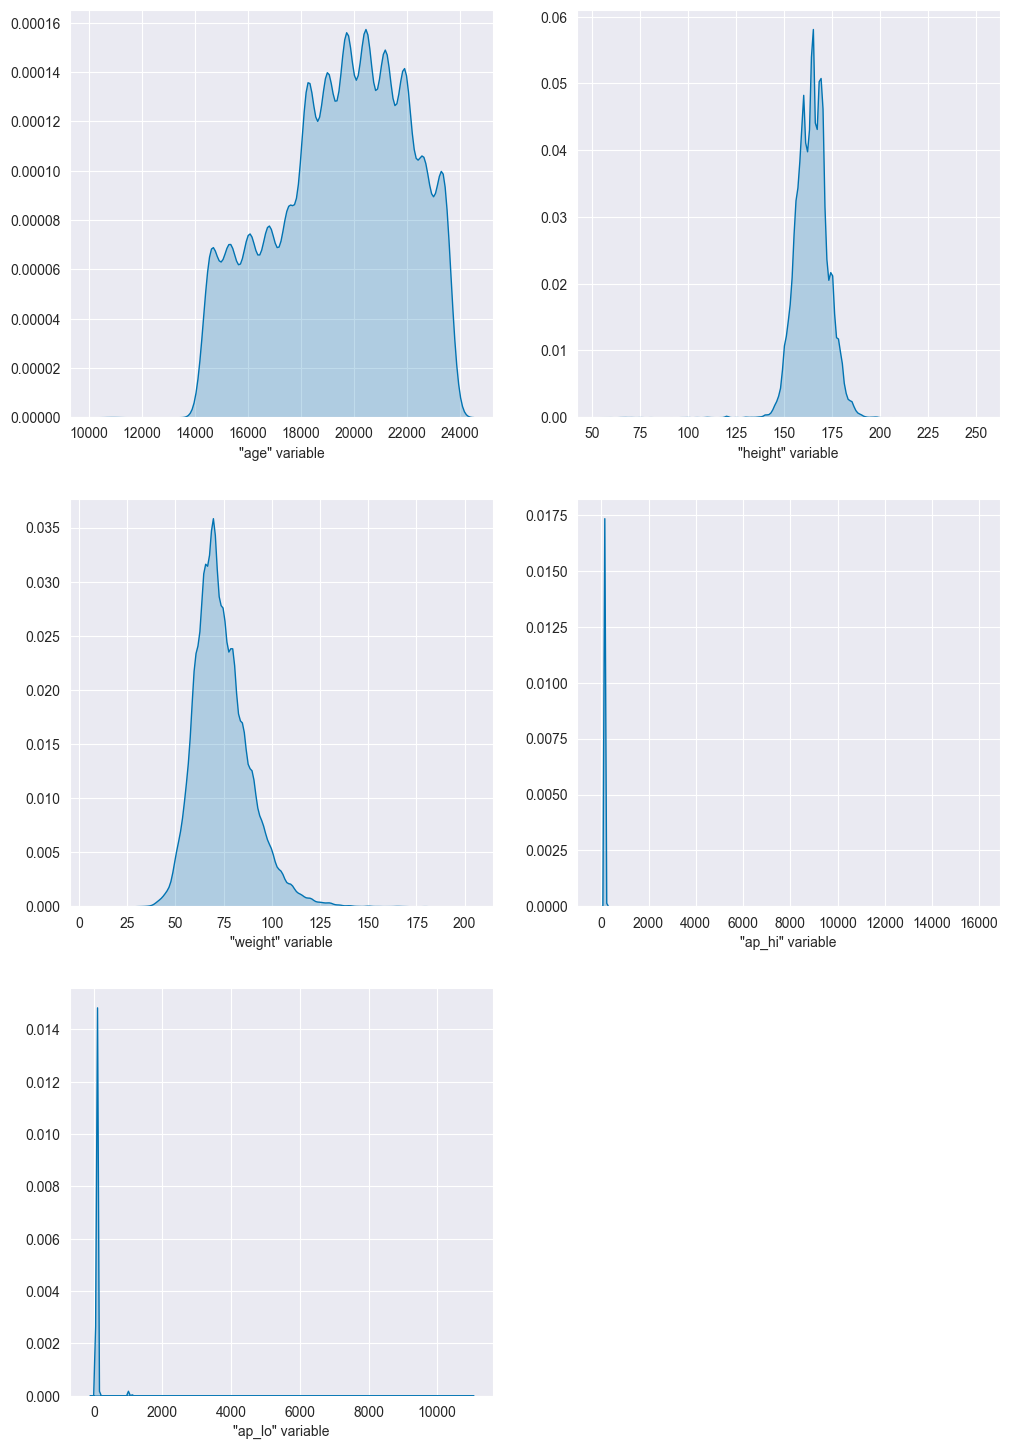


Execution time: 1.77 sec.



In [7]:

hpt.my_kdeplot_multivars_vs_1cat(
    ascvd0,
    x_col=["age", "height", "weight", "ap_hi", "ap_lo"],
    hue_col=None,
    subplot_col=2,
    figsize=(4, 6),
)

Visualizing categorical distributions:

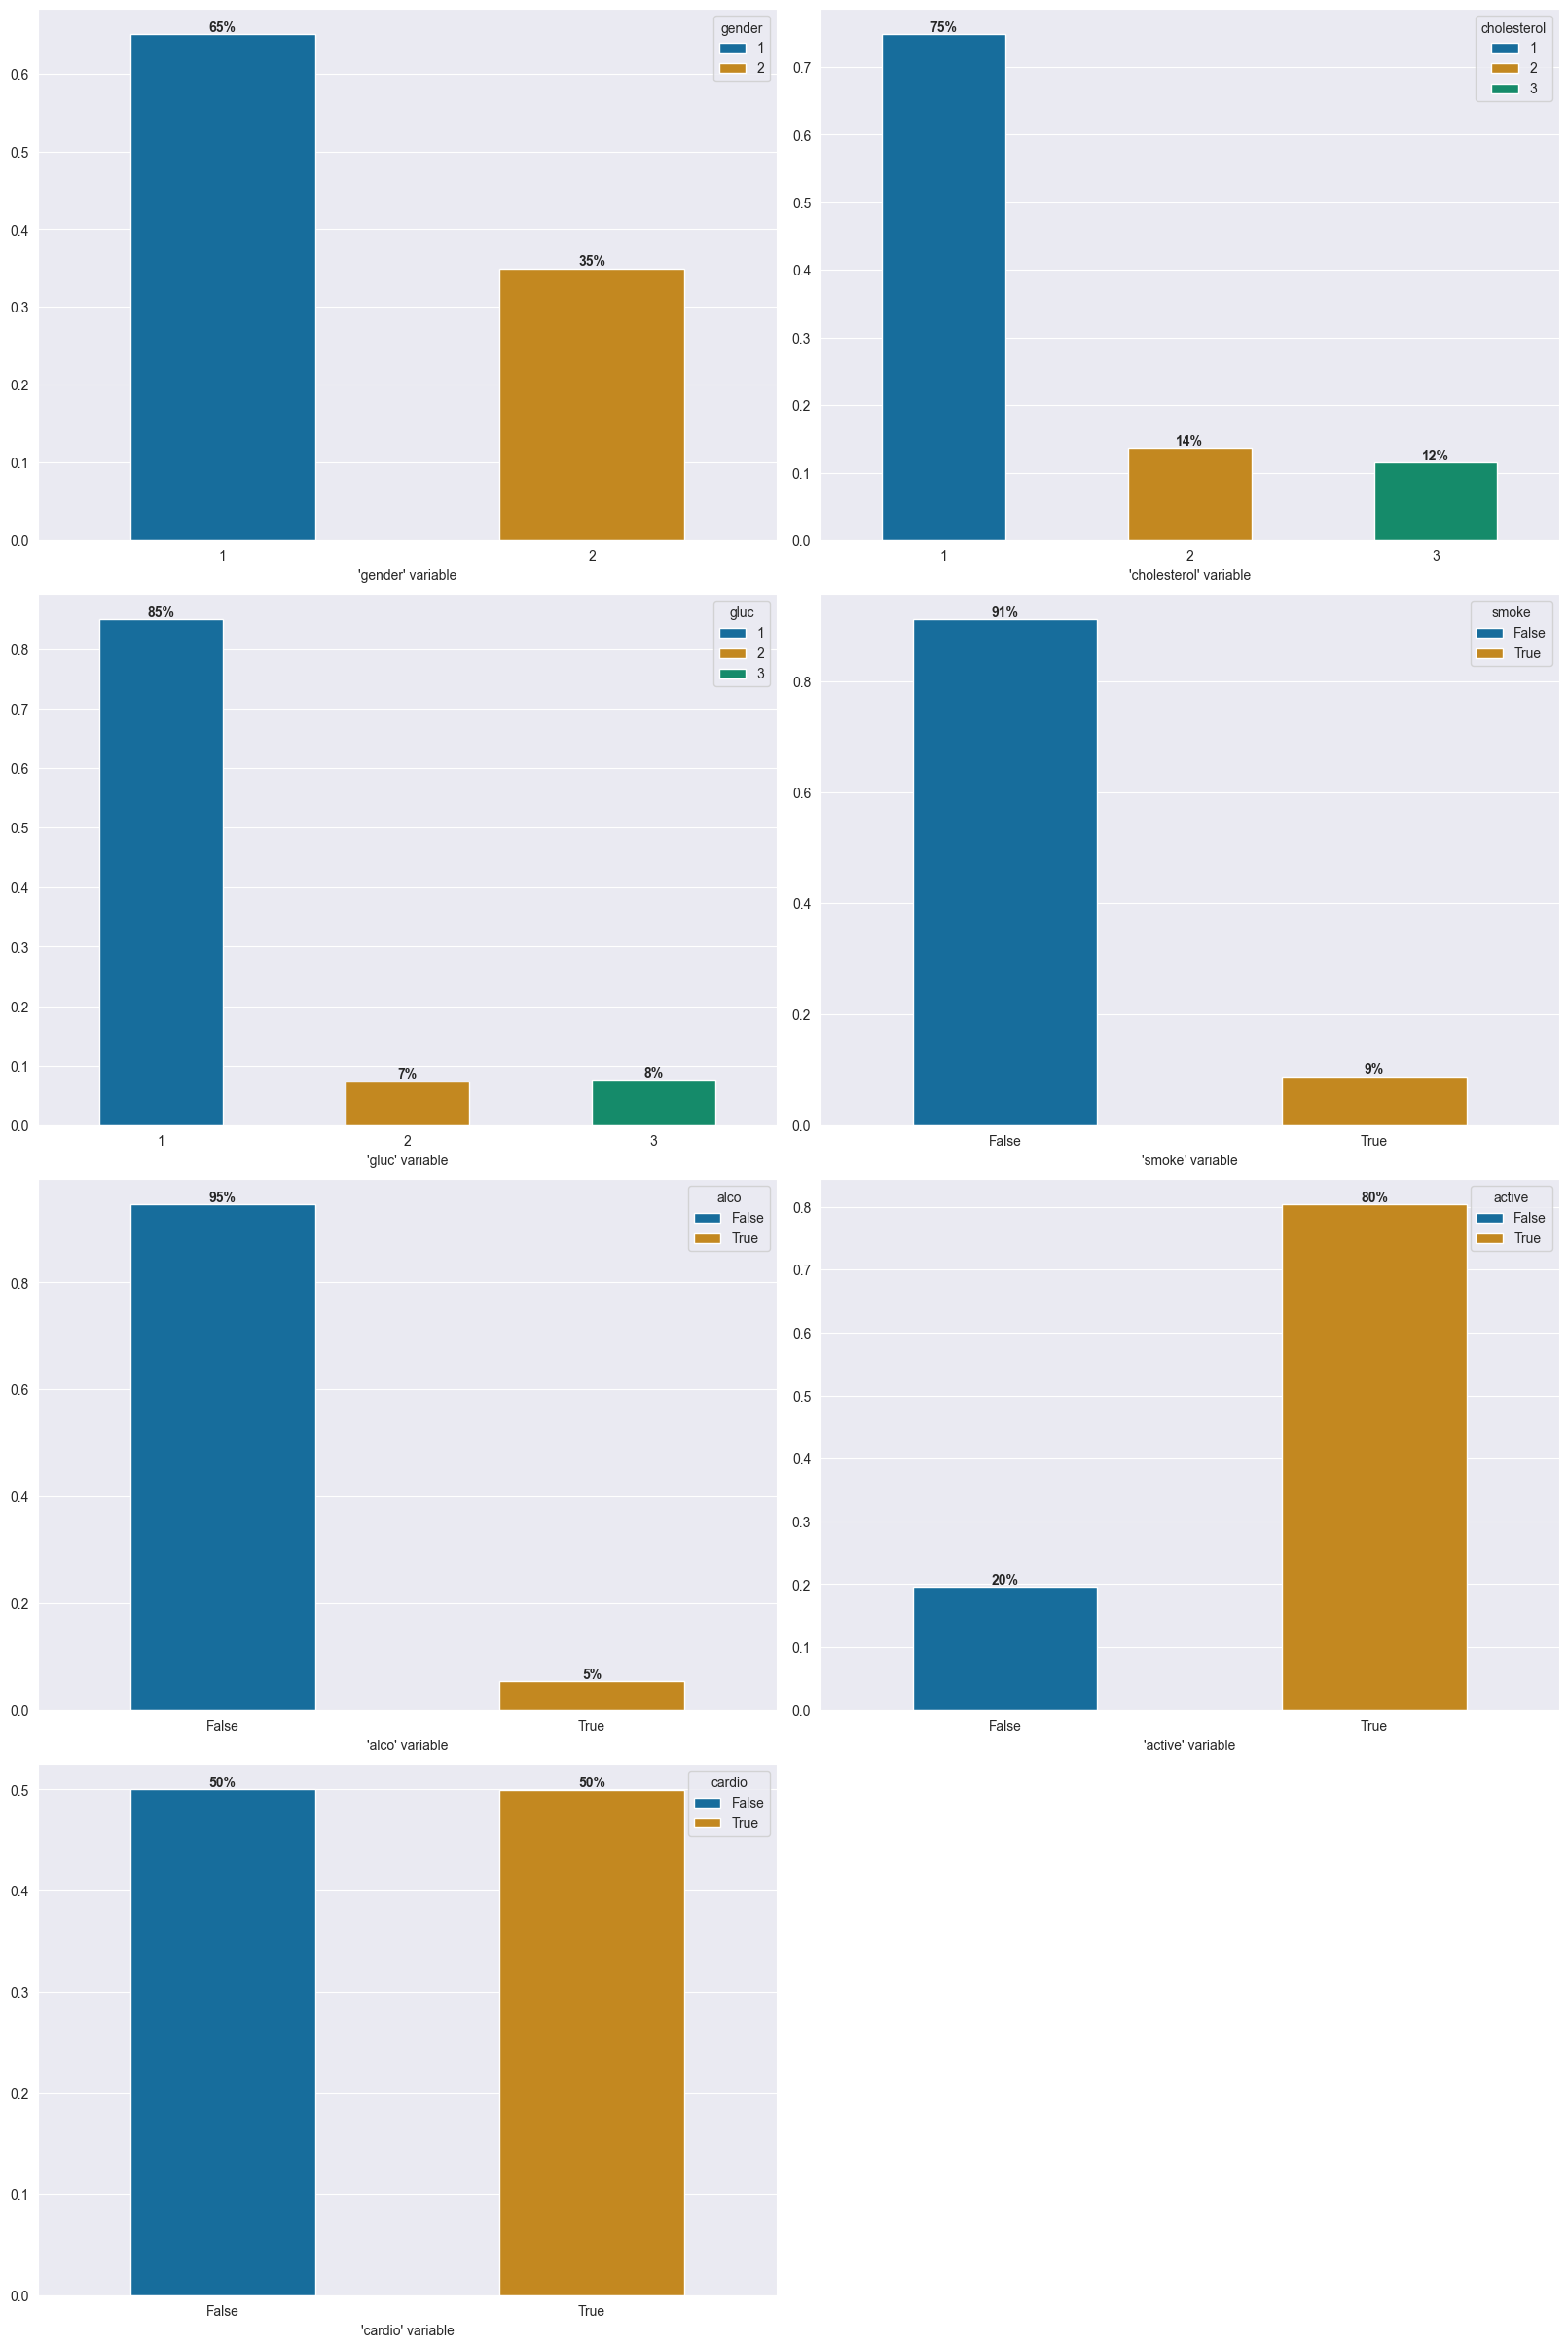


Execution time: 1.21 sec.



In [8]:

hpt.my_countplot_multicats_vs_1cat(
    ascvd0, 
    x_col=['gender','cholesterol','gluc', 'smoke', 'alco', 'active', 'cardio'], 
    y_col=None,
    hue_col=None,
    bar_format = {'proportion': '{:.0%}'},
    subplot_col=2,
    figsize=(4,6)
    )

**Observation:**   

We can see that the label classes ('cardio' variable) are balanced.

# **4. Data Preparation**

## 4.1. Data Cleaning

We check the data to identify and resolve data quality issues.

In [9]:

ascvd0_41 = ascvd0.copy()

### (+) Data Constraints Problems: Data Range

We use the blood pressure range from "Extremely low blood pressure - 50/35 mmHg" to "High blood pressure stage 4 - 210/120 mmHg" to remove the out-of-range values in the 'ap_hi' and 'ap_lo' variables.   
([Blood Pressure Chart: High, Low or Normal for Adults & Children by Age](https://www.knowcentre.com/blood-pressure-chart-high-low-age-men-women/))

In [10]:

# Filter 'ap_hi', 'ap_lo' column
ascvd0_41=hfc.my_filter_df_by_multi_col(
    ascvd0_41,
    dict_of_params={
        "ap_hi": [[210], "<=", "and", ">=", [50], False],
        "ap_lo": [[120], "<=", "and", ">=", [35], False],
    },
    kind="and"
)

### (+) Data Uniformity Problems: Crossfield Validation

The systolic blood pressure is always higher than the diastolic blood pressure. So, we filter the dataset to remove 'ap_lo' values higher than 'ap_hi' values.

In [11]:

# Filter 'ap_hi', 'ap_lo' column
ascvd0_41 = ascvd0_41[
    (ascvd0_41["ap_lo"] < ascvd0_41["ap_hi"])
].reset_index(drop=True)

### (+) Data Uniformity Problems: Uniqueness Constraints

In this step, we will check the uniqueness constraints of the dataset to ensure that there are no duplicates within the dataset rows. Then, we will remove duplicate values because they could introduce instability into the machine learning model during training.     

Because all values in 'id' variable are unique and 'cardio' is the target variable for prediction by the machine learning model, we check duplicates on the dataset without these two variables.

In [12]:

hfc.my_check_dup(ascvd0_41, kind="without", subset_col=["id", "cardio"], return_dup=False)


Duplicate values of dataframe:  0
Duplicate values of dataframe without ['id', 'cardio']: 82 



In [13]:

ascvd0_41 = hfc.my_drop_dup_and_chk(
    ascvd0_41, kind="without", subset_col=["id", "cardio"], keep_occurrence=False
)


Drop duplicates done!
The dataframe contains 68523 rows after removing duplicates.


Duplicate values of dataframe:  0
Duplicate values of dataframe without ['id', 'cardio']: 0 



### (+) Missing Data Problems

In [14]:

hfc.my_check_missing(ascvd0_41)

The data has no missing value.


### (+) Outliers detection & treatment

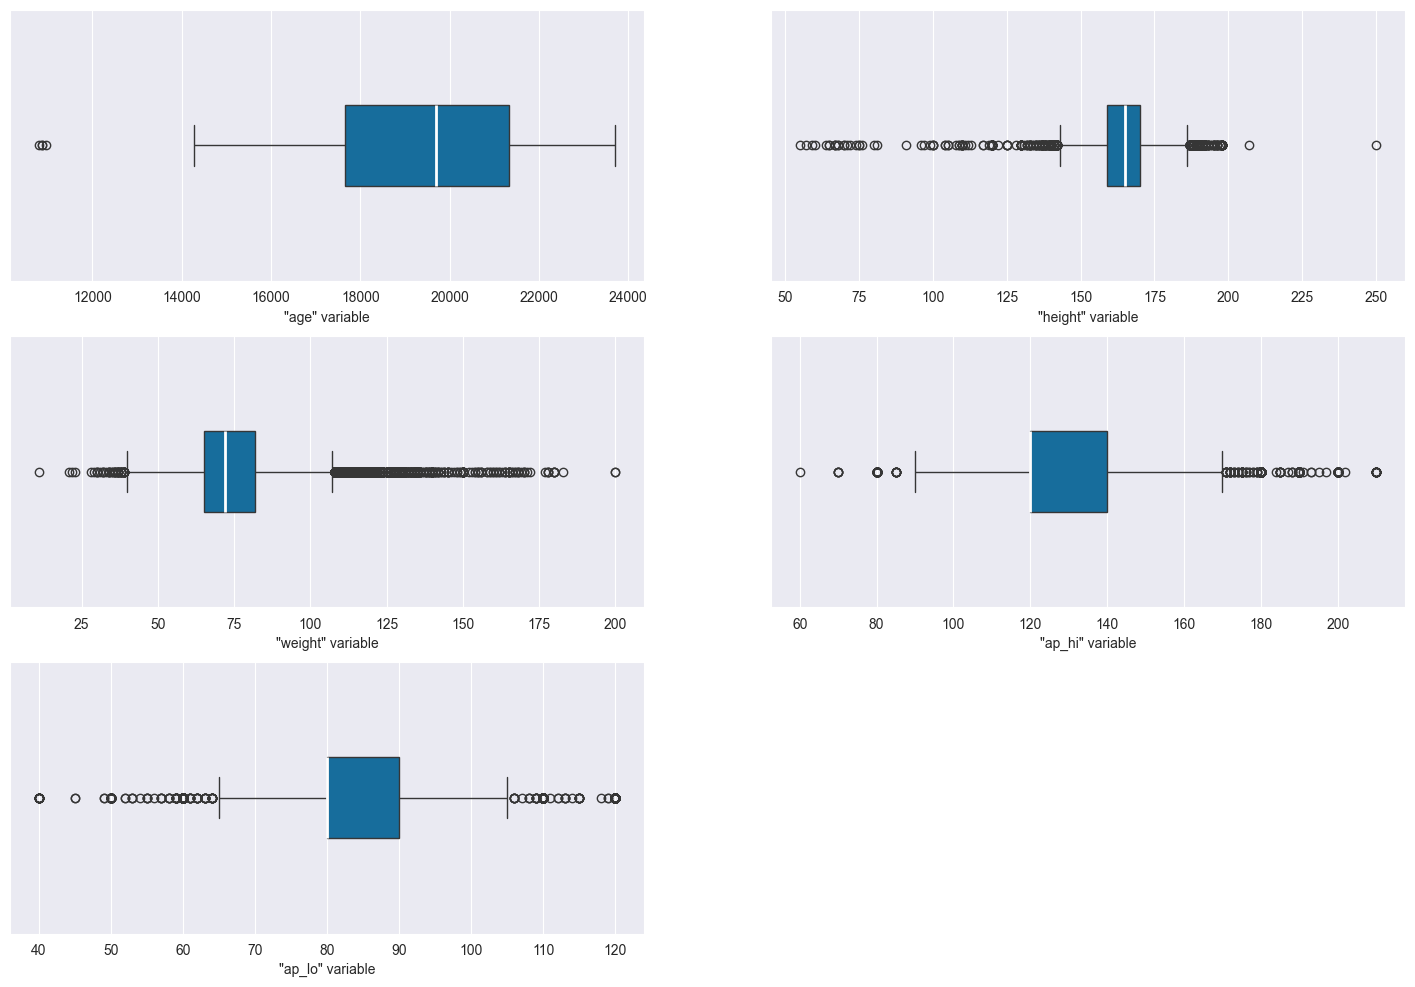


Execution time: 0.78 sec.



In [15]:

hpt.my_boxplot_multinums_vs_1cat(
    ascvd0_41, 
    ["age", "height", "weight", "ap_hi", "ap_lo"],
    y_cat_col=None,
    subplot_col=2,
    figsize=(6,4)    
    )

In [16]:

hfc.my_describe(ascvd0_41[["age", "height", "weight", "ap_hi", "ap_lo"]])

,age,height,weight,ap_hi,ap_lo
dtypes,int64,int64,float64,int64,int64
count,68523.0,68523.0,68523.0,68523.0,68523.0
empty_or_null,...,...,...,...,...
zero,...,...,...,...,...
distinct,8064.0,106.0,281.0,103.0,71.0
top,19741.0,165.0,65.0,120.0,80.0
freq_of_top,32.0,5719.0,3771.0,27582.0,34658.0
max,23713.0,250.0,200.0,210.0,120.0
tukey_upper_fence,...,186.5,107.5,170.0,105.0
95%,23257.0,178.0,100.0,160.0,100.0


We decide to remove outliers according to Tukey's IQR method. Refer to the table above, we have the following:   
- 'age': lower_fence 12152.5  
- 'height': lower_fence 142.5 upper_fence 186.5
- 'weight': lower_fence 39.5 upper_fence 107.5
- 'ap_hi': lower_fence 90.0 upper_fence 170.0  
- 'ap_lo': lower_fence 65.0 upper_fence 105.0 
 
However, to prevent the loss of information during analysis, we have removed only outliers lower than the Tukey-lower-fence in 'age', 'height', and 'weight' variables.

In [17]:

outlier_list=hfc.my_iqr_detecting_outliers(
    ascvd0_41,
    ["age", "height", "weight", "ap_hi", "ap_lo"]
)
ascvd0_41=hfc.my_drop_rows_by_index(ascvd0_41,outlier_list)
# hfc.my_describe(ascvd0_331[["age", "height", "weight", "ap_hi", "ap_lo"]])


Determining a list of indices of outliers: Done!


Drop rows done!



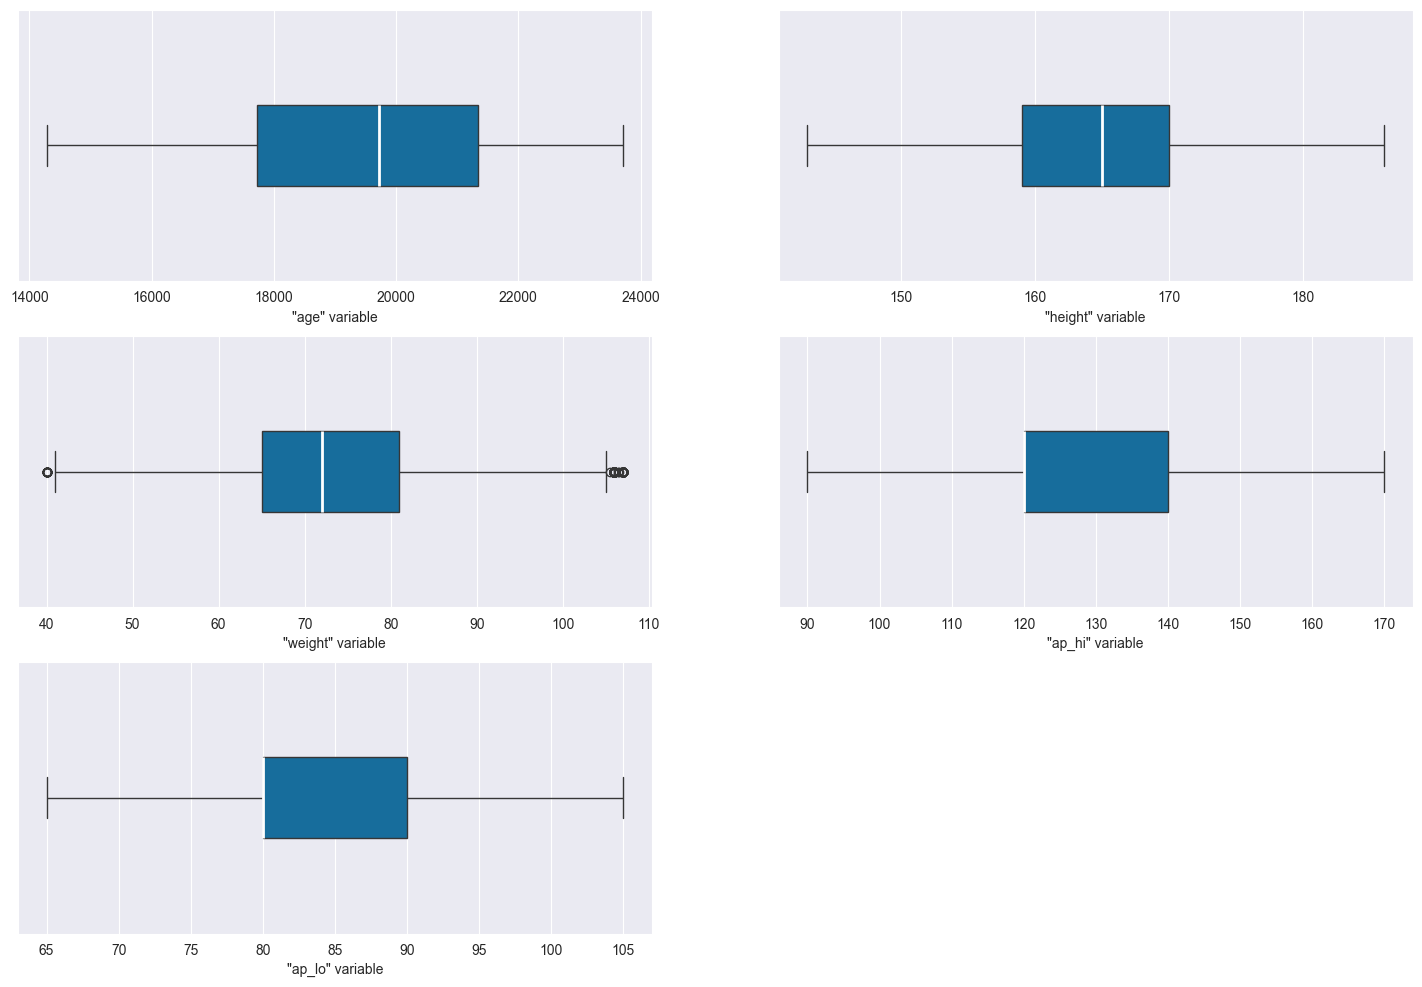


Execution time: 0.66 sec.



In [18]:

hpt.my_boxplot_multinums_vs_1cat(
    ascvd0_41, 
    ["age", "height", "weight", "ap_hi", "ap_lo"],
    y_cat_col=None,
    subplot_col=2,
    figsize=(6,4)    
    )

## 4.2. Data Transformation

To make the data more accessible and more suitable for our analysis goals, we take several tasks, including: 
- Convert the patient's age from day to year, then create 'age_range' from 'age_year'.

In [19]:

ascvd0_42 = ascvd0_41.copy()

In [20]:

ascvd0_42 = ascvd0_42.assign(
    age_year=ascvd0_42["age"]
    .apply(lambda x: math.ceil(x / 365)
    )
)

ascvd0_42 = hfc.my_binning_data(
    ascvd0_42,
    cut_and_name={"age_year": "age_range"},
    bins=[0, 44, 49, 54, 59, 64, np.inf],
    label_names=["<45", "45-49", "50-54", "55-59", "60-64", ">64"],
    labels_ordered=True,
    right=True,
    qcut=None,
)

- Create a new feature – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)) from 'height' and 'weight', then created 'bmi_range' and ['body_fatness'](https://www.cdc.gov/obesity/basics/adult-defining.html) from 'bmi' features for further analysis.

In [21]:

ascvd0_42 = ascvd0_42.assign(
    bmi=(ascvd0_42["weight"] / ((ascvd0_42["height"] / 100) ** 2))
    # .apply(lambda x: math.ceil(x))
)
ascvd0_42=hfc.my_binning_data(
    ascvd0_42,
    cut_and_name = {"bmi":"bmi_range"},
    bins = [0, 19, 24, 29, 34, np.inf],
    label_names = ["<20", "20-24", "25-29", "30-34", ">34"],
    labels_ordered=True,
    right = True,
    qcut=None
)
ascvd0_42=hfc.my_binning_data(
    ascvd0_42,
    cut_and_name = {"bmi":"body_fatness"},
    bins = [0, 24, np.inf],
    label_names = ["Others", "Overweight-Obesity"],
    labels_ordered=True,
    right = True,
    qcut=None
)

- Create ['systolic_range' and 'hypertension'](https://www.knowcentre.com/blood-pressure-chart-high-low-age-men-women/) features from 'ap_hi' feature.

In [22]:

ascvd0_42=hfc.my_binning_data(
    ascvd0_42,
    cut_and_name = {"ap_hi":"systolic_range"},
    bins = [0, 119, 139, 159, 179, np.inf],
    label_names = ["<120", "120-139", "140-159", "160-179", ">179"],
    labels_ordered=True,
    right = True,
    qcut=None
)
ascvd0_42=hfc.my_binning_data(
    ascvd0_42,
    cut_and_name = {"ap_hi":"hypertension"},
    bins = [0, 129, np.inf],
    label_names = ["Non-Hypertension", "Hypertension"],
    labels_ordered=True,
    right = True,
    qcut=None
)

- Convert numneric-categorical variables to string-categorical variables

In [23]:

ascvd0_42 = hfc.my_string_handling(
    ascvd0_42,
    regex_to_replace={
        "gender": ['gender2',{r"1": "Women", r"2": "Men",}],
        "cholesterol": ["cholesterol2", {r"1": "Normal-Chol", r"2": "Increased-Chol", r"3": "Increased-Chol",}],
        "gluc": ["gluc2", {r"1": "Normal-Gluc", r"2": "Increased-Gluc",r"3": "Increased-Gluc",}],
        "smoke": ["smoke2", {r"False": "No-Smoking", r"True": "Smoking",}],
        "alco": ["alco2",{r"False": "No-Drinking", r"True": "Drinking",}],
        "active": ["active2",{r"False": "Inactivity", r"True": "Activity",}],
        "cardio": ["cardio2",{r"False": "Non-CVD", r"True": "CVD",}],
    },
    to_split=None,
    to_join=None,
    changecase=None,
    strip_char=None,
    strip_accents=False,
)

# Convert 'cholesterol' and 'gluc' to ordinal categorical dtype for easy visualization
ascvd0_42=hfc.my_convert_ordinal_cat_dtype(
    ascvd0_42,
    {'cholesterol2':[1,2],
    'gluc2': [1,2]
    }
)


Unique values in column:

   smoke   alco active cardio age_range bmi_range        body_fatness  \
0  False  False   True  False     55-59     25-29  Overweight-Obesity   
1   True   True  False   True     50-54     20-24              Others   
2    ...    ...    ...    ...     60-64     30-34                 ...   
3    ...    ...    ...    ...     45-49       >34                 ...   
4    ...    ...    ...    ...       <45       <20                 ...   
5    ...    ...    ...    ...       >64       ...                 ...   

  systolic_range      hypertension gender2    cholesterol2           gluc2  \
0        120-139  Non-Hypertension   Women     Normal-Chol     Normal-Gluc   
1        140-159      Hypertension     Men  Increased-Chol  Increased-Gluc   
2           <120               ...     ...             ...             ...   
3        160-179               ...     ...             ...             ...   
4            ...               ...     ...             ...             

- Create 'met_synd2', 'smoke_alco2' and 'lifestyle2' features  

    - In the medical field, a person is diagnosed with [metabolic syndrome](https://www.pfizer.com/disease-and-conditions/metabolic-disorders) when they have at least three out of four metabolic abnormalities, which include raised blood pressure, increased blood cholesterol, increased fasting blood glucose, or obesity. If they have one or two metabolic abnormalities, they will be diagnosed with [pre-metabolic syndrome](https://www.mdpi.com/2075-4426/11/8/700). To assess the combined features that increase a person's risk of cardiovascular disease, we create a feature named 'met_synd2' with three values: MetSynd, Pre-MetSynd, and Non-MetSynd.

- Additionally, we create two more features:  

    - 'smoke_alco2' from 'smoke2' and 'alco2' features, with three values: None, Smoking or Drinking, and Smoking and Drinking.
    -  'lifestyle2' from 'smoke_alco2' features, with six values: Healthy, Activity - Smoking or Drinking, Activity & Smoking and Drinking, Inactivity - No Smoking - No Drinking, Inactivity - Smoking or Drinking, and Inactivity - Smoking and Drinking.


In [24]:

# Create 'diag' with values that are list of values from 4 features: 'hypertension', 'cholesterol2', 'gluc2', 'body_fatness'
ascvd0_42 = ascvd0_42.assign(
    met_synd = ascvd0_42.copy()[['hypertension', 'cholesterol2', 'gluc2', 'body_fatness']].values.tolist())

# Filter and update the 'met_synd' feature by a list of 4 syndromes: "Hypertension", "Increased-Chol", "Increased-Gluc", "Obesity" as follow: 'MetSynd' if 'met_synd' value contains at least 3 out of 4 items from filter list, 'Pre-MetSynd' if 'met_synd' value contains at least 1 or 2 items from filter list, 'Non-MetSynd' otherwise.
ascvd0_42=hfc.my_multi_filter_and_update(
    ascvd0_42,
    multi_filter_dict={
        1: [{
                "met_synd": [["Hypertension", "Increased-Chol", "Increased-Gluc",  "Overweight-Obesity"], {"at_least": [3]}, None, None, None, False]
            }, "and", False, None],
        2: [{
                "met_synd": [["Hypertension", "Increased-Chol", "Increased-Gluc", "Overweight-Obesity"], 
                {"in": [1,2]}, None, None, None, False]
            }, "and", False, None],
        3: [{
                "met_synd": [["Hypertension", "Increased-Chol", "Increased-Gluc", "Overweight-Obesity"],
                {"less_than": [1]}, None, None, None, False]
            }, "and", False, None],
        },
    multi_update_dict={
        1: [{"met_synd": [3, None, 'int'],}, None],
        2: [{"met_synd": [2, None, 'int'],}, None],
        3: [{"met_synd": [1, None, 'int'],}, None],
    })

# Create 'met_synd2'
ascvd0_42 = hfc.my_string_handling(
    ascvd0_42,
    regex_to_replace={
        "met_synd": ["met_synd2", {r"1": "Non-MetSynd", r"2": "Pre-MetSynd", r"3": "MetSynd",}],
    },
    to_split=None, to_join=None, changecase=None, strip_char=None, strip_accents=False,)

# Convert to ordinal dtype
ascvd0_42=hfc.my_convert_ordinal_cat_dtype(ascvd0_42, {'met_synd2':[2,3,1]})


Unique values in column:

   smoke   alco active cardio age_range bmi_range        body_fatness  \
0  False  False   True  False     55-59     25-29  Overweight-Obesity   
1   True   True  False   True     50-54     20-24              Others   
2    ...    ...    ...    ...     60-64     30-34                 ...   
3    ...    ...    ...    ...     45-49       >34                 ...   
4    ...    ...    ...    ...       <45       <20                 ...   
5    ...    ...    ...    ...       >64       ...                 ...   

  systolic_range      hypertension gender2    cholesterol2           gluc2  \
0        120-139  Non-Hypertension   Women     Normal-Chol     Normal-Gluc   
1        140-159      Hypertension     Men  Increased-Chol  Increased-Gluc   
2           <120               ...     ...             ...             ...   
3        160-179               ...     ...             ...             ...   
4            ...               ...     ...             ...             

In [25]:

# Create 'smoke_alco' with values that are list of values from 2 features: 'smoke2', 'alco2'
ascvd0_42 = ascvd0_42.assign(
    smoke_alco = ascvd0_42.copy()[['smoke2', 'alco2']].values.tolist())

# Filter and update the 'smoke_alco' feature
ascvd0_42=hfc.my_multi_filter_and_update(
    ascvd0_42,
    multi_filter_dict={
        1: [{"smoke_alco": [["Smoking", "Drinking"], 
                {"in": [2]}, None, None, None, False]}, "and", False, None],
        2: [{"smoke_alco": [["Smoking", "Drinking"],
                {"in": [1]}, None, None, None, False]}, "and", False, None],
        3: [{"smoke_alco": [["Smoking", "Drinking"],
                {"less_than": [1]}, None, None, None, False]}, "and", False, None],
        },
    multi_update_dict={
        1: [{"smoke_alco": [3, None, 'int'],}, None],
        2: [{"smoke_alco": [2, None, 'int'],}, None],
        3: [{"smoke_alco": [1, None, 'int'],}, None],
    })

# Create 'smoke_alco2'
ascvd0_42 = hfc.my_string_handling(
    ascvd0_42,
    regex_to_replace={
        "smoke_alco": ["smoke_alco2", {r"1": "None", r"2": "Smk | Drk", r"3": "Smk & Drk"}],
    },
    to_split=None, to_join=None, changecase=None, strip_char=None, strip_accents=False,)

# Convert to ordinal dtype
ascvd0_42=hfc.my_convert_ordinal_cat_dtype(ascvd0_42, {'smoke_alco2':[1,2,3]})


Unique values in column:

   smoke   alco active cardio age_range bmi_range        body_fatness  \
0  False  False   True  False     55-59     25-29  Overweight-Obesity   
1   True   True  False   True     50-54     20-24              Others   
2    ...    ...    ...    ...     60-64     30-34                 ...   
3    ...    ...    ...    ...     45-49       >34                 ...   
4    ...    ...    ...    ...       <45       <20                 ...   
5    ...    ...    ...    ...       >64       ...                 ...   

  systolic_range      hypertension gender2    cholesterol2           gluc2  \
0        120-139  Non-Hypertension   Women     Normal-Chol     Normal-Gluc   
1        140-159      Hypertension     Men  Increased-Chol  Increased-Gluc   
2           <120               ...     ...             ...             ...   
3        160-179               ...     ...             ...             ...   
4            ...               ...     ...             ...             

In [26]:

# Create 'lifestyle' with values that are list of values from 2 features: 'smoke_alco2', 'active2'
ascvd0_42 = ascvd0_42.assign(
    lifestyle = ascvd0_42.copy()[['smoke_alco2', 'active2']].values.tolist())

# Filter and update the 'lifestyle' feature
ascvd0_42=hfc.my_multi_filter_and_update(
    ascvd0_42,
    multi_filter_dict={
        1: [{"lifestyle": [["Smk | Drk", "Smk & Drk", "Inactivity"], 
                {"in": [2]}, None, None, None, False]}, "and", False, None],
        2: [{"lifestyle": [["Smk | Drk", "Smk & Drk", "Activity"],
                {"in": [2]}, None, None, None, False]}, "and", False, None],
        3: [{"lifestyle": [["None", "Inactivity"],
                {"in": [2]}, None, None, None, False]}, "and", False, None],
        4: [{"lifestyle": [["None", "Activity"],
                {"in": [2]}, None, None, None, False]}, "and", False, None],
        },
    multi_update_dict={
        1: [{"lifestyle": [4, None, 'int'],}, None],
        2: [{"lifestyle": [3, None, 'int'],}, None],
        3: [{"lifestyle": [2, None, 'int'],}, None],
        4: [{"lifestyle": [1, None, 'int'],}, None],
    })

# Create 'lifestyle2'
ascvd0_42 = hfc.my_string_handling(
    ascvd0_42,
    regex_to_replace={
        "lifestyle": 
            ["lifestyle2", 
                    {
                        r"4": "Very Unhealthy",
                        r"3": "Unhealthy & Activity",
                        r"2": "Healthy & Inactivity",
                        r"1": "Very Healthy", 
                    }],
    },
    to_split=None, to_join=None, changecase=None, strip_char=None, strip_accents=False,)

# Convert to ordinal dtype
ascvd0_42=hfc.my_convert_ordinal_cat_dtype(ascvd0_42, {'lifestyle2':[1,2,3,4]})


Unique values in column:

   smoke   alco active cardio age_range bmi_range        body_fatness  \
0  False  False   True  False     55-59     25-29  Overweight-Obesity   
1   True   True  False   True     50-54     20-24              Others   
2    ...    ...    ...    ...     60-64     30-34                 ...   
3    ...    ...    ...    ...     45-49       >34                 ...   
4    ...    ...    ...    ...       <45       <20                 ...   
5    ...    ...    ...    ...       >64       ...                 ...   

  systolic_range      hypertension gender2    cholesterol2           gluc2  \
0        120-139  Non-Hypertension   Women     Normal-Chol     Normal-Gluc   
1        140-159      Hypertension     Men  Increased-Chol  Increased-Gluc   
2           <120               ...     ...             ...             ...   
3        160-179               ...     ...             ...             ...   
4            ...               ...     ...             ...             

## 4.3. Data Validation

In the final step of data preparation, we re-check to ensure that the data is valid.

In [27]:

ascvd0_43 = ascvd0_42.copy()
ascvd0_43.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_range,bmi,bmi_range,body_fatness,systolic_range,hypertension,gender2,cholesterol2,gluc2,smoke2,alco2,active2,cardio2,met_synd,met_synd2,smoke_alco,smoke_alco2,lifestyle,lifestyle2
15173,24187,20284,2,154,52.0,130,80,1,1,True,True,True,False,56,55-59,21.926126,20-24,Others,120-139,Hypertension,Men,Normal-Chol,Normal-Gluc,Smoking,Drinking,Activity,Non-CVD,2,Pre-MetSynd,3,Smk & Drk,3,Unhealthy & Activity
5108,8155,22737,1,169,66.0,130,70,1,1,False,False,True,True,63,60-64,23.108435,20-24,Others,120-139,Hypertension,Women,Normal-Chol,Normal-Gluc,No-Smoking,No-Drinking,Activity,CVD,2,Pre-MetSynd,1,None,1,Very Healthy
14365,22896,22806,2,176,79.0,130,80,1,1,False,False,True,False,63,60-64,25.503616,25-29,Overweight-Obesity,120-139,Hypertension,Men,Normal-Chol,Normal-Gluc,No-Smoking,No-Drinking,Activity,Non-CVD,2,Pre-MetSynd,1,None,1,Very Healthy
1593,2519,20536,1,164,87.0,120,79,1,3,False,False,True,False,57,55-59,32.346817,30-34,Overweight-Obesity,120-139,Non-Hypertension,Women,Normal-Chol,Increased-Gluc,No-Smoking,No-Drinking,Activity,Non-CVD,2,Pre-MetSynd,1,None,1,Very Healthy
32313,51703,20528,1,153,71.0,110,85,3,3,False,False,True,True,57,55-59,30.330215,30-34,Overweight-Obesity,<120,Non-Hypertension,Women,Increased-Chol,Increased-Gluc,No-Smoking,No-Drinking,Activity,CVD,3,MetSynd,1,None,1,Very Healthy


In [28]:

hfc.my_check_dup(ascvd0_43, kind="without", subset_col=["id", "cardio"], return_dup=False)

hfc.my_check_dup(ascvd0_43, kind='with', subset_col=['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc','smoke', 'alco', 'active'])


Duplicate values of dataframe:  0
Duplicate values of dataframe without ['id', 'cardio']: 0 


Duplicate values of dataframe:  0
Duplicate values of ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']: 0 



In [29]:

hfc.my_describe(ascvd0_43, without=None, cat_cutoff=12)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_range,bmi,bmi_range,body_fatness,systolic_range,hypertension,gender2,cholesterol2,gluc2,smoke2,alco2,active2,cardio2,met_synd,met_synd2,smoke_alco,smoke_alco2,lifestyle,lifestyle2
dtypes,int64,int64,int64,int64,float64,int64,int64,int64,int64,bool,bool,bool,bool,int64,category,float64,category,category,category,category,object,category,category,object,object,object,object,Int64,category,Int64,category,Int64,category
count,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0
empty_or_null,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zero,1.0,...,...,...,...,...,...,...,...,57021.0,59157.0,12221.0,31580.0,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
distinct,62417.0,7992.0,2.0,44.0,179.0,75.0,41.0,3.0,3.0,2.0,2.0,2.0,2.0,26.0,6.0,2642.0,5.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0
top,0,21892,1,165,65.0,120,80,1,1,False,False,True,False,56,55-59,23.875115,25-29,Overweight-Obesity,120-139,Non-Hypertension,Women,Normal-Chol,Normal-Gluc,No-Smoking,No-Drinking,Activity,Non-CVD,2,Pre-MetSynd,1,None,1,Very Healthy
freq_of_top,1.0,30.0,40649.0,5378.0,3584.0,26574.0,33748.0,47126.0,53320.0,57021.0,59157.0,50196.0,31580.0,3525.0,16390.0,894.0,26712.0,45441.0,35849.0,37476.0,40649.0,47126.0,53320.0,57021.0,59157.0,50196.0,31580.0,40751.0,40751.0,55377.0,55377.0,44273.0,44273.0
max,99999.0,23713.0,...,186.0,107.0,170.0,105.0,...,...,...,...,...,...,65.0,...,50.89,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tukey_upper_fence,...,...,...,...,105.0,...,...,...,...,...,...,...,...,...,...,38.59,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95%,94957.2,23261.0,...,178.0,96.0,155.0,100.0,...,...,...,...,...,...,64.0,...,35.82,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [30]:

ascvd1 = ascvd0_43.copy()

# **5. Exploratory Analysis**

## 5.1. Univariate Analysis

In [31]:

hfc.my_describe(ascvd1.select_dtypes(exclude=['object', 'category', 'bool']), without=["id"])

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,age_year,bmi,met_synd,smoke_alco,lifestyle
dtypes,int64,int64,int64,float64,int64,int64,int64,int64,int64,float64,Int64,Int64,Int64
count,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0,62417.0
empty_or_null,...,...,...,...,...,...,...,...,...,...,...,...,...
zero,...,...,...,...,...,...,...,...,...,...,...,...,...
distinct,7992.0,2.0,44.0,179.0,75.0,41.0,3.0,3.0,26.0,2642.0,3.0,3.0,4.0
top,21892.0,1.0,165.0,65.0,120.0,80.0,1.0,1.0,56.0,23.875115,2.0,1.0,1.0
freq_of_top,30.0,40649.0,5378.0,3584.0,26574.0,33748.0,47126.0,53320.0,3525.0,894.0,40751.0,55377.0,44273.0
max,23713.0,...,186.0,107.0,170.0,105.0,...,...,65.0,50.89,...,...,...
tukey_upper_fence,...,...,...,105.0,...,...,...,...,...,38.59,...,...,...
95%,23261.0,...,178.0,96.0,155.0,100.0,...,...,64.0,35.82,...,...,...


In [32]:

hfc.my_check_category_data(ascvd1, count=False, normalize=True)


Unique values in column:



,gender,,cholesterol,,gluc,,smoke,,alco,,active,,cardio,,age_range,,bmi_range,,body_fatness,,systolic_range,,hypertension,,gender2,,cholesterol2,,gluc2,,smoke2,,alco2,,active2,,cardio2,,met_synd,,met_synd2,,smoke_alco,,smoke_alco2,,lifestyle,,lifestyle2,
0,1,65.125%,1,75.502%,1,85.425%,False,91.355%,False,94.777%,True,80.420%,False,50.595%,55-59,26.259%,25-29,42.796%,Overweight-Obesity,72.802%,120-139,57.435%,Non-Hypertension,60.041%,Women,65.125%,Normal-Chol,75.502%,Normal-Gluc,85.425%,No-Smoking,91.355%,No-Drinking,94.777%,Activity,80.420%,Non-CVD,50.595%,2,65.288%,Pre-MetSynd,65.288%,1,88.721%,None,88.721%,1,70.931%,Very Healthy,70.931%
1,2,34.875%,2,13.176%,3,7.520%,True,8.645%,True,5.223%,False,19.580%,True,49.405%,50-54,24.456%,20-24,26.063%,Others,27.198%,140-159,21.132%,Hypertension,39.959%,Men,34.875%,Increased-Chol,24.498%,Increased-Gluc,14.575%,Smoking,8.645%,Drinking,5.223%,Inactivity,19.580%,CVD,49.405%,3,17.955%,MetSynd,17.955%,2,8.690%,Smk | Drk,8.690%,2,17.790%,Healthy & Inactivity,17.790%
2,...,...,3,11.322%,2,7.054%,...,...,...,...,...,...,...,...,60-64,20.818%,30-34,21.182%,...,...,<120,16.571%,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,1,16.757%,Non-MetSynd,16.757%,3,2.589%,Smk & Drk,2.589%,3,9.489%,Unhealthy & Activity,9.489%
3,...,...,...,...,...,...,...,...,...,...,...,...,...,...,45-49,13.085%,>34,8.825%,...,...,160-179,4.862%,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,4,1.790%,Very Unhealthy,1.790%
4,...,...,...,...,...,...,...,...,...,...,...,...,...,...,<45,12.240%,<20,1.134%,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,...,...,...,...,...,...,...,...,...,...,...,...,...,...,>64,3.142%,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


**Observation:**  
- Demographics and physical characteristics:
    - Females outnumber males by almost two times.
    - The majority of people are aged 49 to 59, with the most frequently occurring age being 56.
    - The average BMI of individuals is nearly 28, which is classified as overweight by the World Health Organization (a BMI of 30 or higher is classified as obese).
- Health examination results:
    - The average blood pressure of individuals is almost 127/82, which is considered high-normal blood pressure. Meanwhile, almost 40% of individuals have hypertension syndrome.  
    - Most individuals have normal blood cholesterol and blood glucose levels.
- Lifestyle:
    - Almost 90% of individuals do not smoke and do not consume alcohol. 
    - The majority of people lead an active lifestyle.  
- ASCVD: 
    - Approximately 51% of individuals have ASCVD.

## 5.2. Bi-variate Analysis

### (+) Numerical vs Categorical Variable

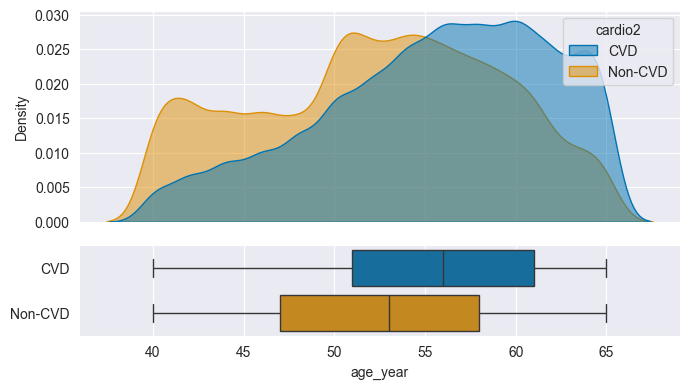

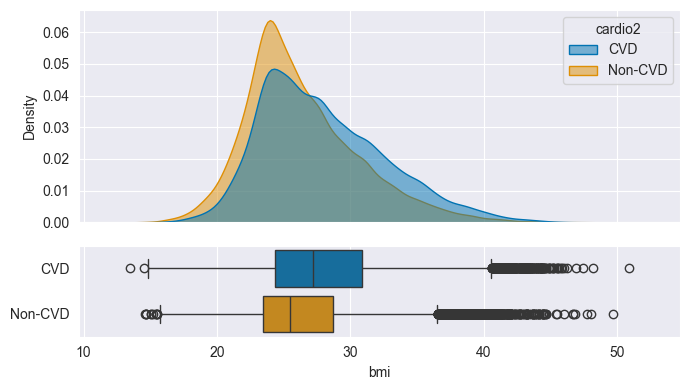

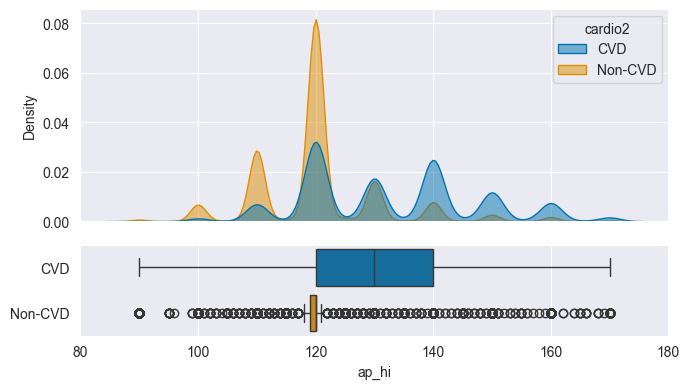

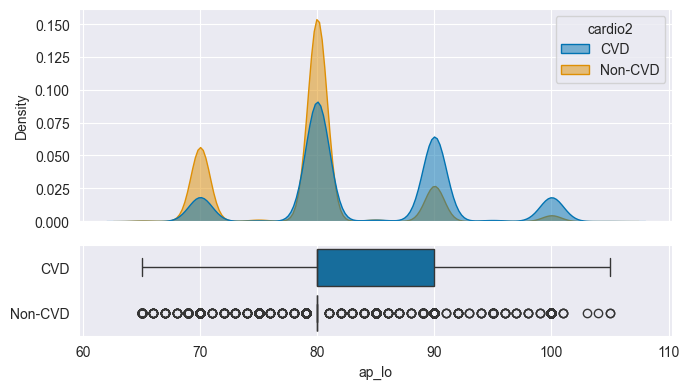


Execution time: 2.73 sec.



In [33]:

# Plot a histogram and boxplot of 'cardio' variable distribution vs some continous variables
hpt.my_kde_boxplot_cont_vs_cat(
    ascvd1, ["age_year", "bmi", "ap_hi", "ap_lo"], "cardio2", figsize=(7, 4),
)

### (+) Categorical vs Categorical Variable

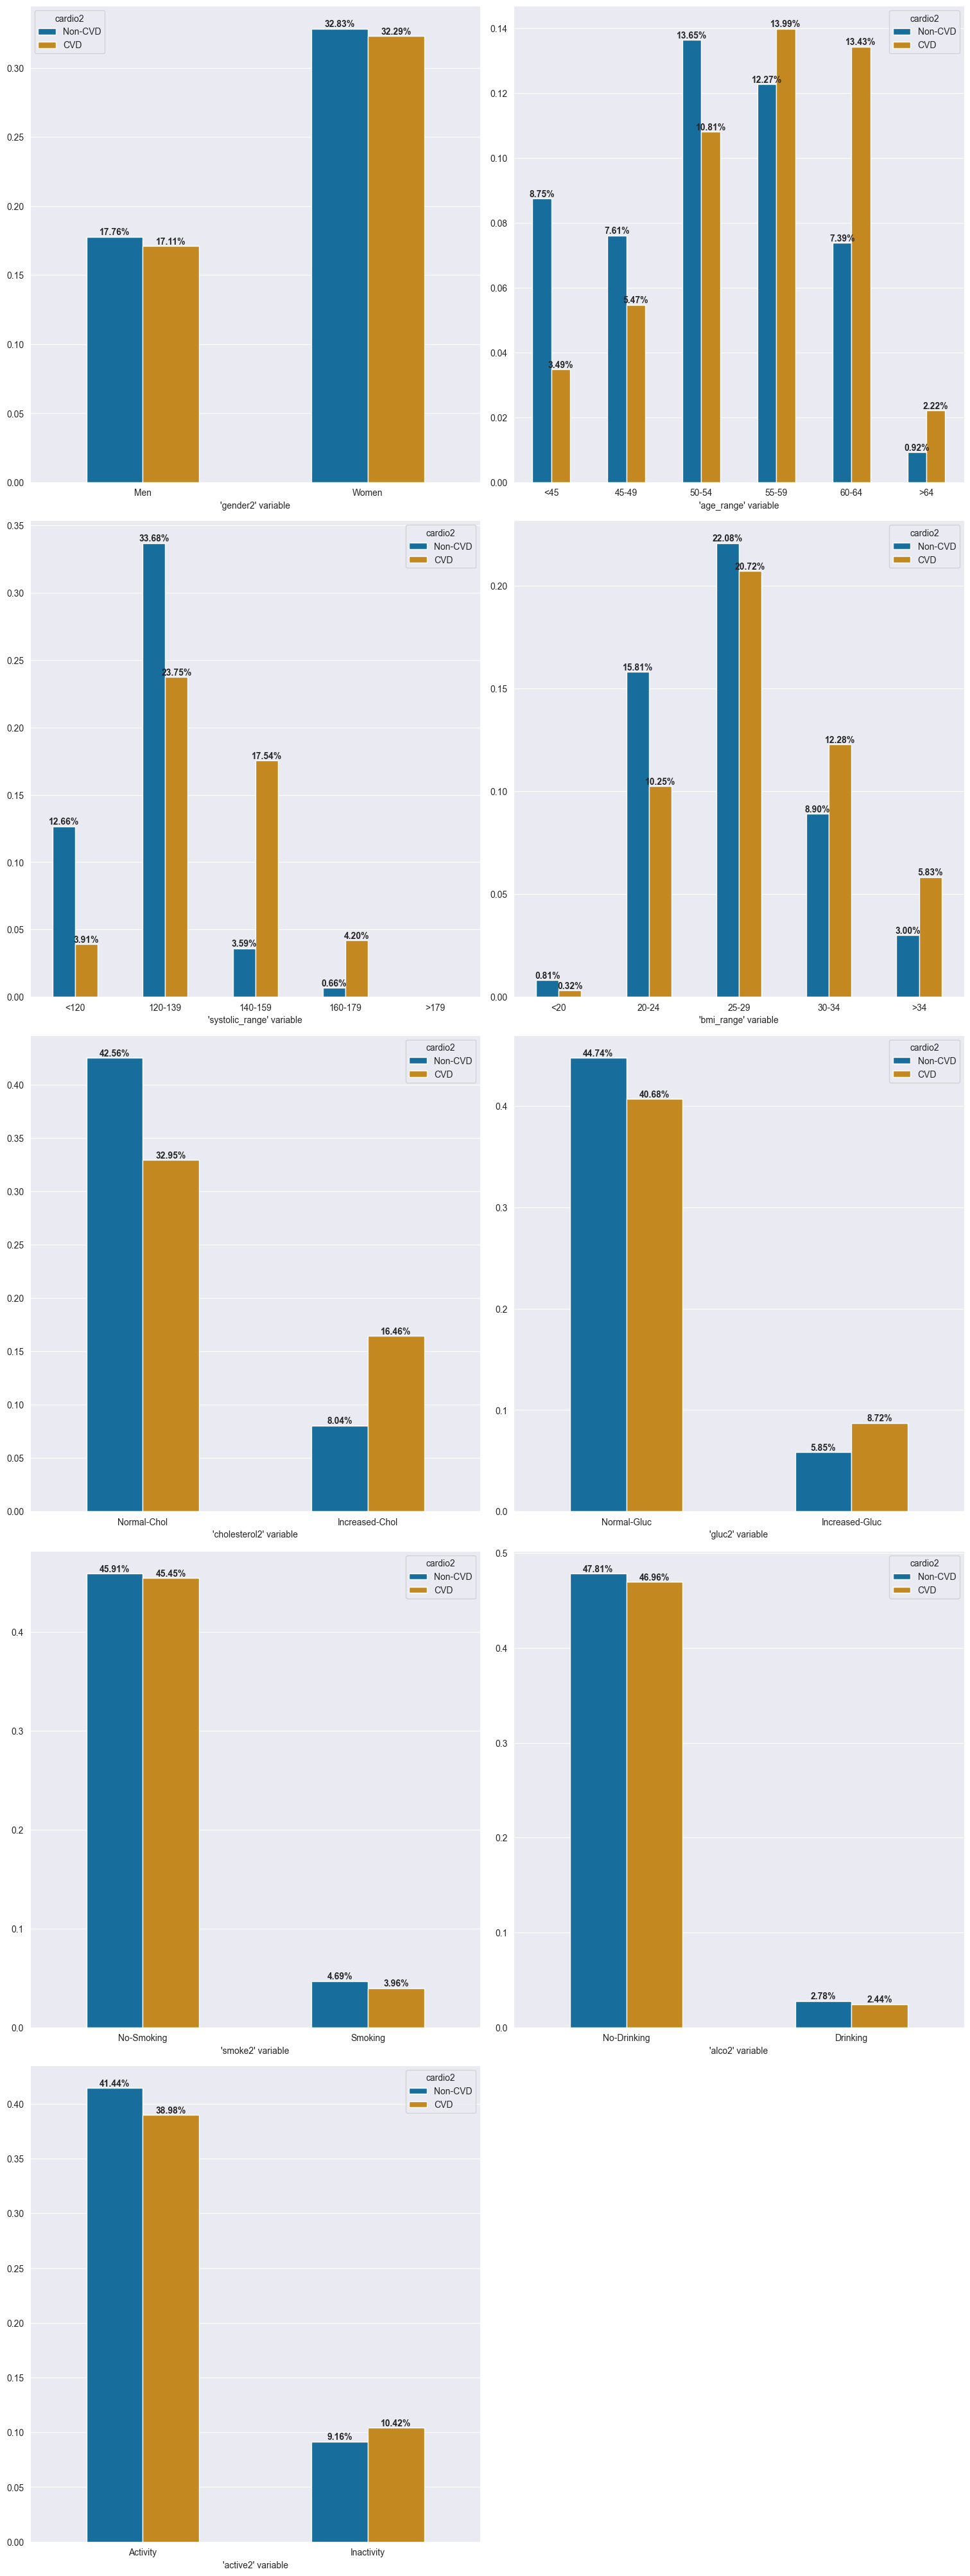


Execution time: 2.08 sec.



In [34]:

hpt.my_countplot_multicats_vs_1cat(
    ascvd1,
    x_col=["gender2", "age_range", "systolic_range", "bmi_range", "cholesterol2", "gluc2", "smoke2", "alco2", "active2"],
    y_col=None,
    hue_col="cardio2",
    bar_format = {'proportion' : '{:.2%}'},
    subplot_col=2,
    figsize=(3,8)
)

**Observation:**  
- Demographics and physical characteristics:
    - There is no noticeable difference in the likelihood of having ASCVD in each gender.
    - People aged 55 or above have a higher likelihood of having ASCVD. Significantly, among people aged 60 or above, those with ASCVD outnumber by more than two times those without ASCVD.
    - Individuals with a BMI of 30 or above are likelier to have ASCVD.
- Health examination results:
    - Among people with hypertension (a systolic blood pressure of 140 or above), those with ASCVD outnumber by more than five times those without ASCVD.
    - People with increased blood glucose or cholesterol are more likely to have ASCVD.
- Lifestyle:
    - There are no differences in the likelihood of having ASCVD between individuals who do not smoke or consume alcohol and those who do.
    - However, people who are not physically active are more likely to have ASCVD.

## 5.3. Multivariate Analysis

### (+) The combined impact of all features on the prevalence of ASCVD

After considering the impact of each feature, we have discovered that age, metabolic abnormalities, body fatness, and high blood pressure significantly increase the likelihood of developing ASCVD. Meanwhile, a sedentary lifestyle has a lower impact on developing ASCVD. However, among individuals who have unhealthy habits, such as smoking or drinking, the number of those with ASCVD is lower than those without ASCVD. 

To better understand the collective impact of the above features, we will analyze four features created in section 3.3.2, including: 'gender2', 'age_range', 'met_synd2' and 'lifestyle2'.


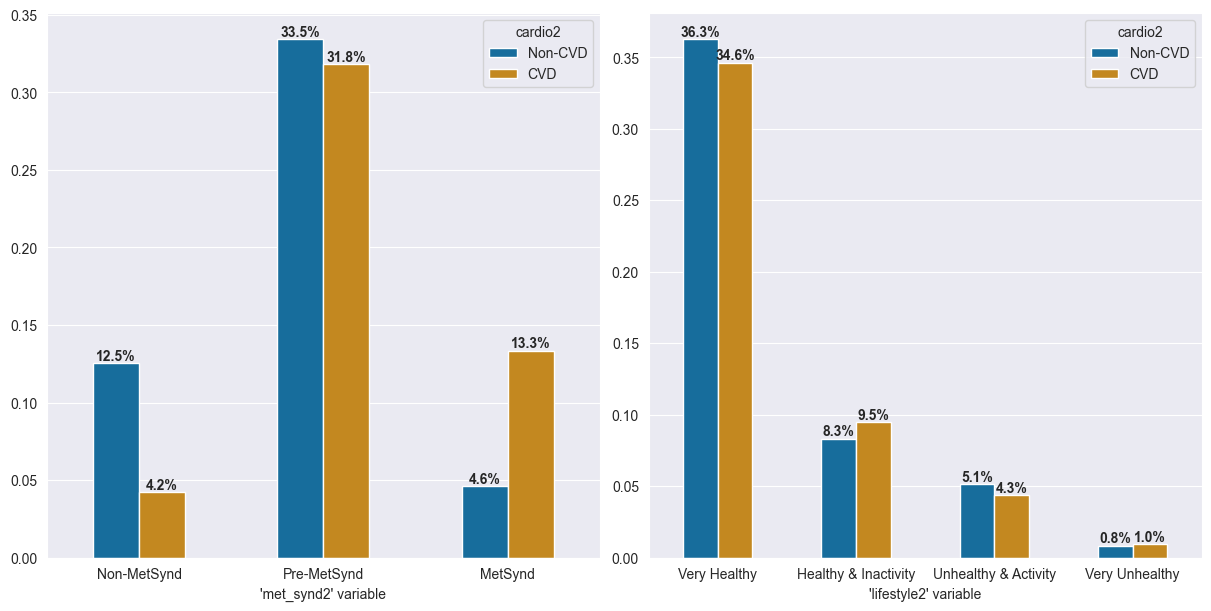


Execution time: 0.42 sec.



In [35]:

hpt.my_countplot_multicats_vs_1cat(
    ascvd1,
    x_col=["met_synd2", "lifestyle2"],
    y_col=None,
    hue_col="cardio2",
    bar_format = {'proportion' : '{:.1%}'},
    subplot_col=2,
    figsize=(12,6)
)

**Observation**:  
- Individuals with [metabolic syndrome](https://www.pfizer.com/disease-and-conditions/metabolic-disorders) are almost three times more likely to develop ASCVD than those without it.

- Moreover, individuals who smoke or drink or both (unhealthy) but engage in more physical activity are less likely to develop ASCVD. In contrast, individuals who do not smoke or drink alcohol (healthy) but lead a sedentary lifestyle are more likely to develop ASCVD. 

It appears that a healthy lifestyle (not smoking and/or not drinking alcohol) does not have as much impact on the ability not to develop ASCVD as a physical activity lifestyle. But are these data reliable? We will perform a statistical test such as the Chi-square test to examine the relationship between 'cardio' and 'smoke_alco", 'cardio' and 'active', 'cardio' and 'lifestyle'  (using the Pingouin library).

- The relationship between 'cardio' and 'smoke_alco':  

    - Null hypothesis: Smoking and/or drinking lead to the development of ASCVD.

    - Alternative hypothesis: There is no association between smoking and/or drinking and prevalence of ASCVD.

    - Threshold: alpha = 0.05

In [36]:

hfc.my_chi_square_test(
    ascvd1,
    x_col='smoke_alco',
    y_col='cardio',
    correction=True,
    threshold=0.05,
    hypothesis_testing=True
)


Chi-squared test result: The p-value is less than alpha.


Hypothesis testing result: The 'Null hypothesis' is rejected!



,chi^2,p-value,alpha
0,35.675462,2.514835e-08,0.05


- The relationship between 'cardio' and 'active':  

    - Null hypothesis: There is no association between active lifestyle and prevalence of ASCVD.

    - Alternative hypothesis: Leading a sedentary lifestyle is more likely to develop ASCVD.

    - Threshold: alpha = 0.05

In [37]:

hfc.my_chi_square_test(
    ascvd1,
    x_col='active',
    y_col='cardio',
    correction=True,
    threshold=0.05,
    hypothesis_testing=True
)


Chi-squared test result: The p-value is less than alpha.


Hypothesis testing result: The 'Null hypothesis' is rejected!



,chi^2,p-value,alpha
0,88.592669,5.640771e-21,0.05


- The relationship between 'cardio' and 'lifestyle':  

    - Null hypothesis: There is no association beetween smoking and/or drinking and inactivity (unhealthy lifestyle) and the development of ASCVD.

    - Alternative hypothesis: Smoking and/or drinking and inactivity (unhealthy lifestyle) lead to the development of ASCVD.

    - Threshold: alpha = 0.05

In [38]:

g=hfc.my_chi_square_test(
    ascvd1,
    x_col='lifestyle',
    y_col='cardio',
    correction=True,
    threshold=0.05,
    hypothesis_testing=True
)


Chi-squared test result: The p-value is less than alpha.


Hypothesis testing result: The 'Null hypothesis' is rejected!



The statistical test indicates that:  

- There is **no association** between **smoking and/or drinking** and the **prevalence of ASCVD**. 

- Leading a **sedentary lifestyle** is **more likely to develop ASCVD**. 

- **Smoking and/or drinking** and **inactivity** (unhealthy lifestyle) lead to the **development of ASCVD**.

We will now continue to examine the combined impact of age, metabolic syndrome, and lifestyle on the prevalence of ASCVD.

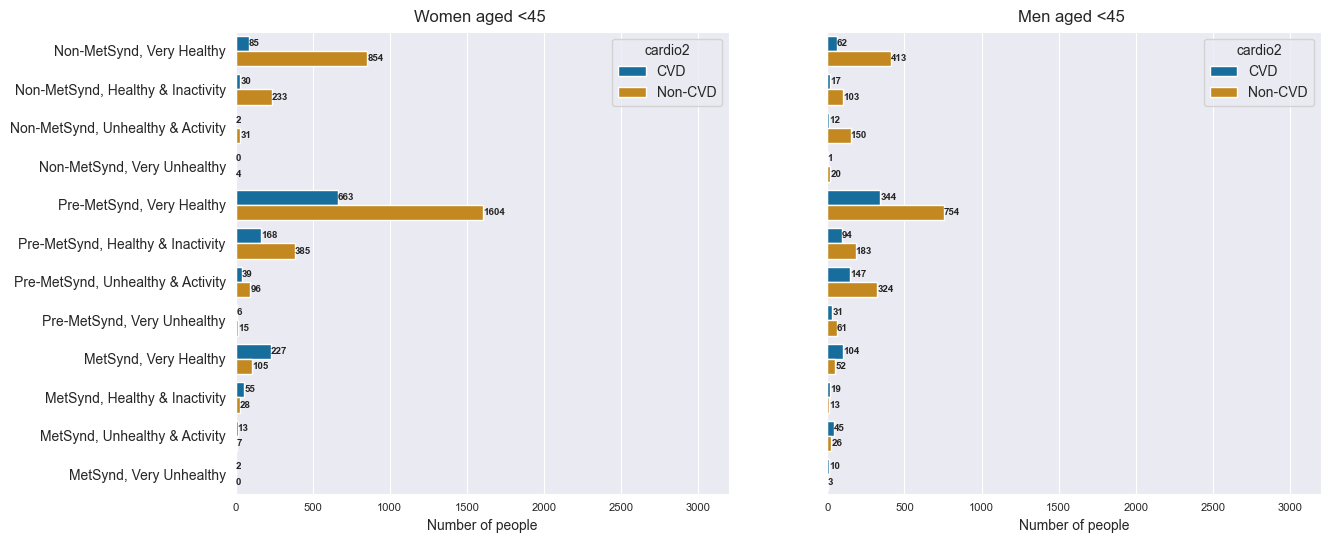

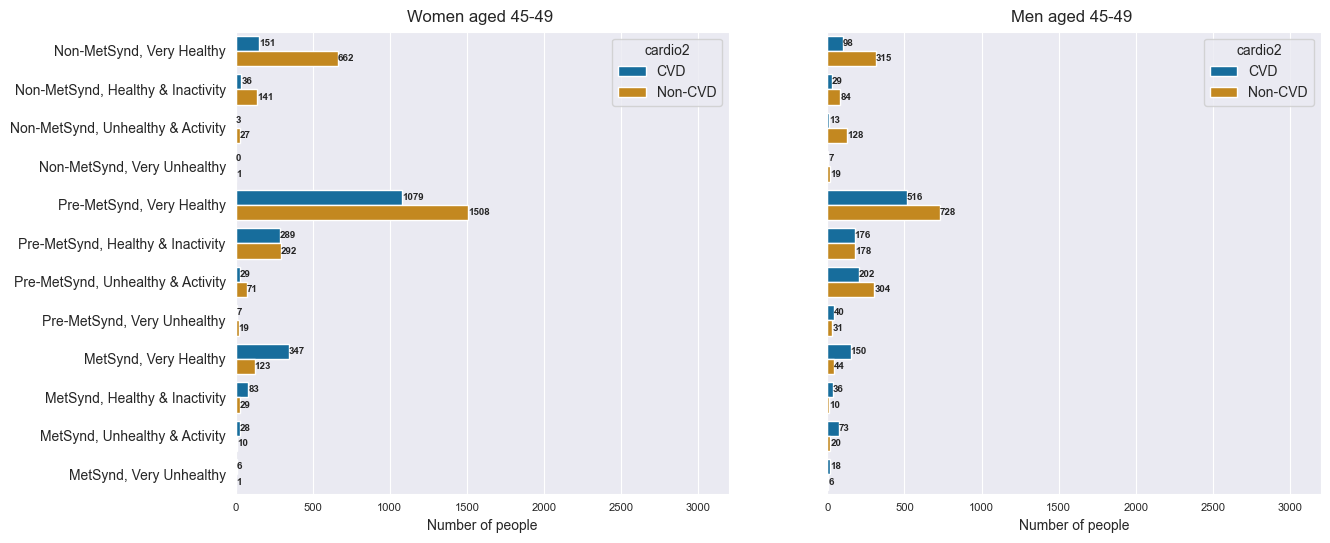

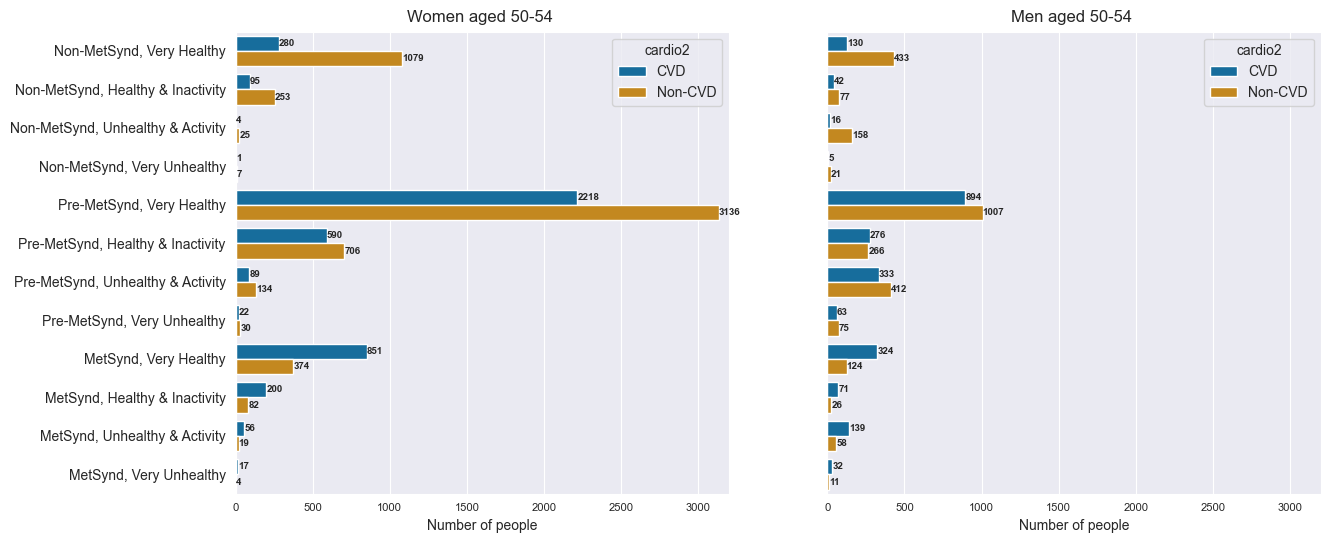

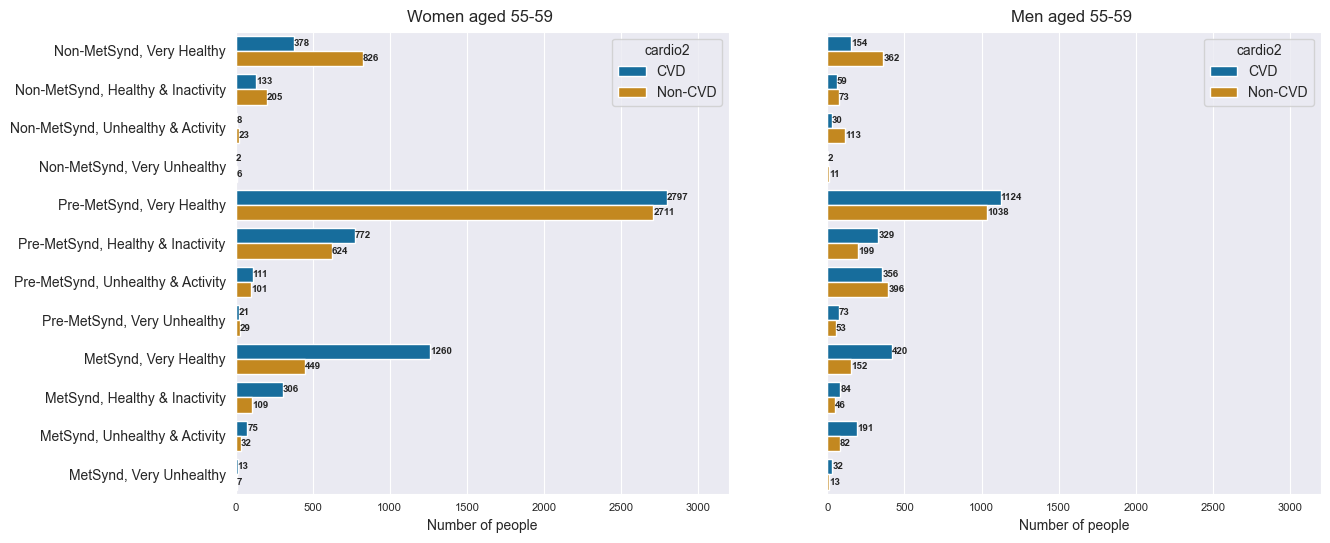

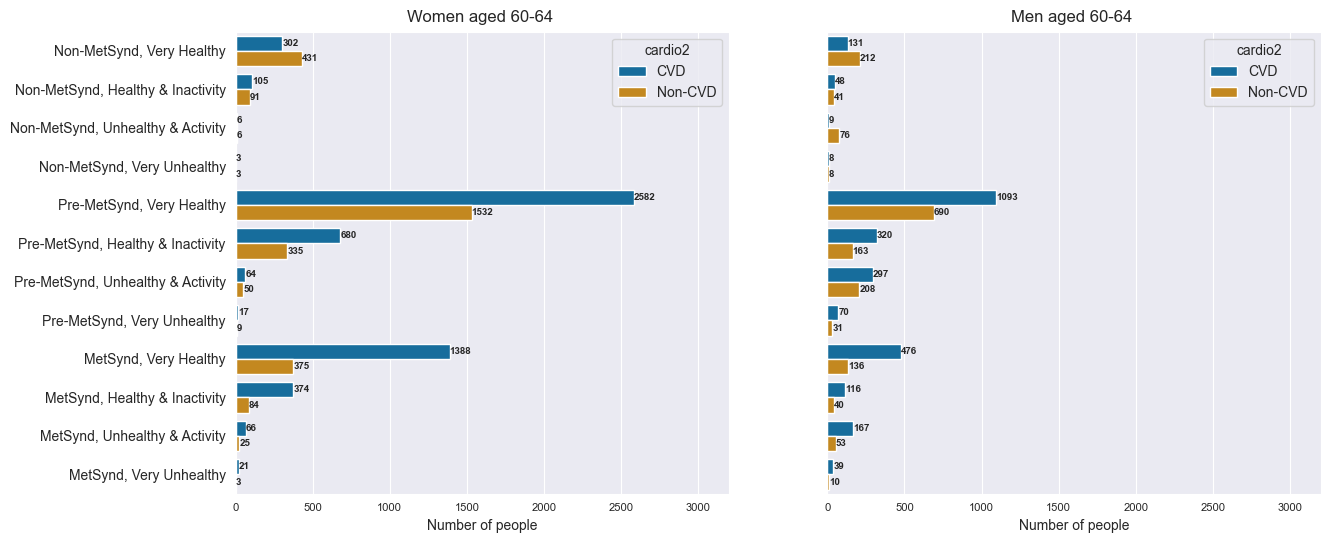

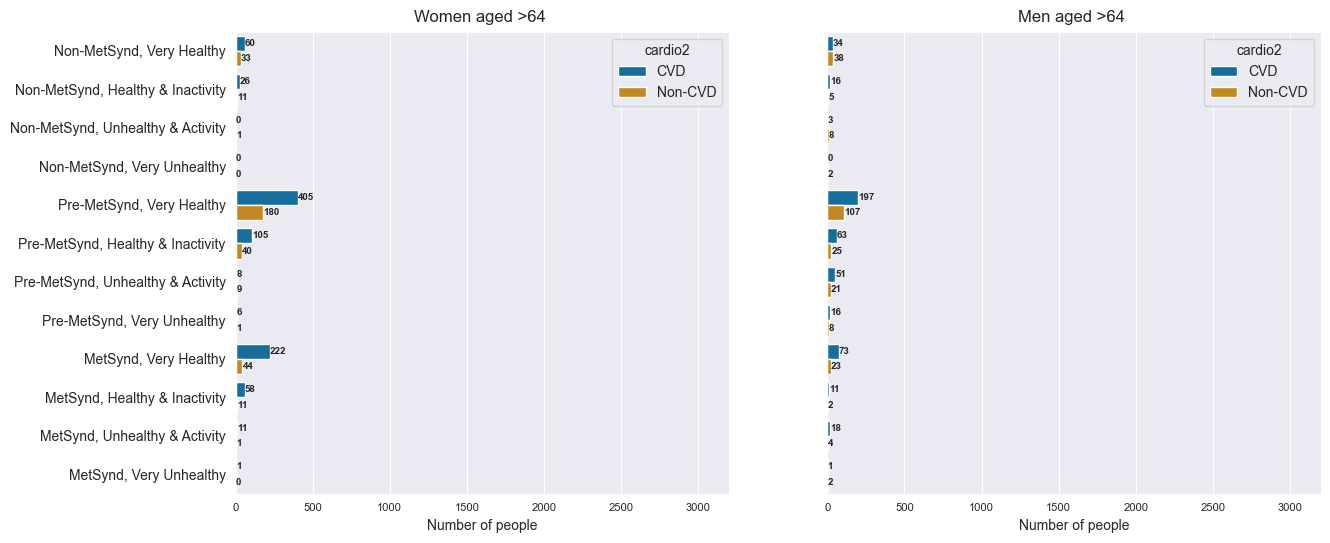

In [39]:

age_lim = {"<45": 3200, "45-49": 3200, "50-54": 3200, "55-59": 3200, "60-64": 3200, ">64": 3200}
for i, lim in age_lim.items():
    men_age_cardio = hfc.my_sql_groupby_agg_having(
        ascvd1,
        where_dict={
            "gender2": [["Men"], "==", None, None, None, False],
            "age_range": [[i], "==", None, None, None, False],
        },
        where_kind="and",
        col_to_group=["met_synd2", "lifestyle2", "cardio2"],
        index_to_group=None,
        group_dropna=None,
        agg_dict={
            "cardio2": ["count"],
        },
        unstack=None,
        multi_level_col=False,
        reset_idx_lv=[2],
        multi_level_index=False,
        having=None,
        having_kind="and",
        total_row=False,
        total_col=False,
        normalize=None,
        sort_vals=None,
        sort_idx=None,
    )
    women_age_cardio = hfc.my_sql_groupby_agg_having(
        ascvd1,
        where_dict={
            "gender2": [["Women"], "==", None, None, None, False],
            "age_range": [[i], "==", None, None, None, False],
        },
        where_kind="and",
        col_to_group=["met_synd2", "lifestyle2", "cardio2"],
        index_to_group=None,
        group_dropna=None,
        agg_dict={
            "cardio2": ["count"],
        },
        unstack=None,
        multi_level_col=False,
        reset_idx_lv=[2],
        multi_level_index=False,
        having=None,
        having_kind="and",
        total_row=False,
        total_col=False,
        normalize=None,
        sort_vals=None,
        sort_idx=None,
    )

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    hpt.my_barplot(
        df=women_age_cardio,
        y=women_age_cardio.index,
        x="cardio2_count",
        hue="cardio2",
        errorbar=None,
        palette="colorblind",
        figsize=(3, 2),
        title_size=[f"Women aged {i} ", "center", 12, 7.0],
        x_label=["Number of people", 8, 0, (0, lim)],
        y_label=[None, 10, 0, None],
        hide_ticklabels=False,
        bar_label=["edge", 0, "%g", 7, "bold"],
        ax=ax1,
    )
    hpt.my_barplot(
        df=men_age_cardio,
        y=men_age_cardio.index,
        x="cardio2_count",
        hue="cardio2",
        errorbar=None,
        palette="colorblind",
        figsize=(3, 2),
        title_size=[f"Men aged {i} ", "center", 12, 7.0],
        x_label=["Number of people", 8, 0, (0, lim)],
        y_label=[None, 10, 0, None],
        hide_ticklabels="y",
        bar_label=["edge", 0, "%g", 7, "bold"],
        ax=ax2,
    )

**Observation:**  

- The incidence of ASCVD increases with the severity of metabolic diseases, unhealthy lifestyles, and physical inactivity.

- In addition, there also seems to be an impact of gender on the prediction of ASCVD. Specifically, the incidence of ASCVD increases more steeply in older women when compared with men.

We will perform a Chi-square test to examine the relationship between 'gender' and 'cardio" using the Pingouin library to confirm the impact of gender on the predection of ASCVD.

- Null hypothesis: There is no association between gender and prevalence of ASCVD.

- Alternative hypothesis: Gender differences have an impact on the prevalence of ASCVD.

- Threshold: alpha = 0.05

In [40]:

hfc.my_chi_square_test(
    ascvd1,
    x_col='gender',
    y_col='cardio',
    correction=True,
    threshold=0.05,
    hypothesis_testing=True
)


Chi-squared test result: The p-value is not less than alpha.


Hypothesis testing result: The 'Null hypothesis' failed to be rejected!



,chi^2,p-value,alpha
0,1.542944,0.214205,0.05


The statistical test indicates that:  

- There is **no association** between **gender** and the **prevalence of ASCVD**.

### (+) The correlation between all features

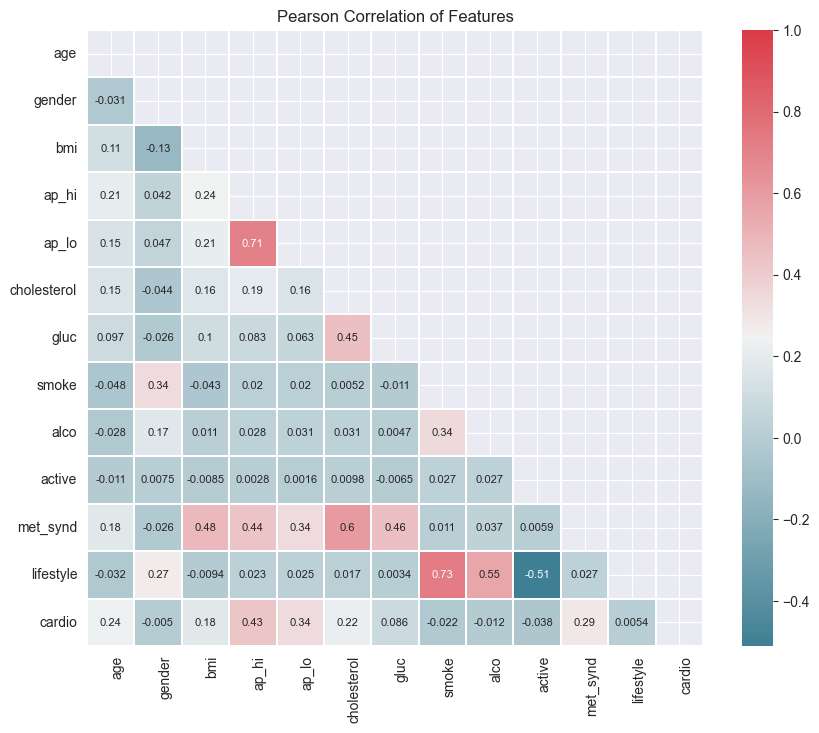

There is a 'Weak positive correlation' between 'age' and 'cardio'.
There is a 'Weak negative correlation' between 'gender' and 'cardio'.
There is a 'Weak positive correlation' between 'bmi' and 'cardio'.
There is a 'Moderate positive correlation' between 'ap_hi' and 'cardio'.
There is a 'Moderate positive correlation' between 'ap_lo' and 'cardio'.
There is a 'Weak positive correlation' between 'cholesterol' and 'cardio'.
There is a 'Weak positive correlation' between 'gluc' and 'cardio'.
There is a 'Weak negative correlation' between 'smoke' and 'cardio'.
There is a 'Weak negative correlation' between 'alco' and 'cardio'.
There is a 'Weak negative correlation' between 'active' and 'cardio'.
There is a 'Weak positive correlation' between 'met_synd' and 'cardio'.
There is a 'Weak positive correlation' between 'lifestyle' and 'cardio'.


In [41]:

# Correlation heatmap of dataset
hpt.my_correlation_heatmap(ascvd1[['age', 'gender', 'bmi', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc','smoke', 'alco', 'active', 'met_synd', 'lifestyle', 'cardio']], 
    method="pearson",
    figsize = (10, 8),
    title_and_num_size = [12, 8],
    x_label = [10, 90, "right"],
    y_label = [10, 0, "right"],
    interpretations={'cardio':['age', 'gender', 'bmi', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc','smoke', 'alco', 'active', 'met_synd', 'lifestyle']}
    )

## 5.4. Summary

The preliminary analysis of the data has revealed that particular features may increase the possibility of developing ASCVD (atherosclerotic cardiovascular disease).

- People who are 55 years old or above are at a higher risk of developing cardiovascular disease.

- Every component of the metabolic syndrome, which includes high blood pressure, high blood glucose, high cholesterol, and obesity, is an independent risk factor for cardiovascular disease. However, the probability of developing cardiovascular disease further increases when these risk factors are combined.

- People who lead a healthy lifestyle, such as not smoking or drinking, or both, and being physically active, have a lower chance of developing cardiovascular disease, even if they have one of the metabolic syndrome diseases.

# **6. Modeling and Evaluation**

## 6.1. Preprocessing

### 6.1.1. Feature Extraction

Based on the above analysis, we have included the following features as input and output for the machine learning modeling step.

In [42]:

ascvd1_611 = ascvd1[['gender', 'age', 'bmi', 'ap_hi', 'cholesterol', 'gluc', 'lifestyle', 'cardio']]

ascvd1_611 = hfc.my_convert_dtype(ascvd1_611, dtype_for_all={"all": ["bool", "int", 1, 0],}) # True: 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62417 entries, 0 to 62416
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       62417 non-null  int64  
 1   age          62417 non-null  int64  
 2   bmi          62417 non-null  float64
 3   ap_hi        62417 non-null  int64  
 4   cholesterol  62417 non-null  int64  
 5   gluc         62417 non-null  int64  
 6   lifestyle    62417 non-null  Int64  
 7   cardio       62417 non-null  int64  
dtypes: Int64(1), float64(1), int64(6)
memory usage: 3.9 MB

 None


#### (+) Handling Duplicates

In [43]:

hfc.my_check_dup(
    ascvd1_611,
    kind='without',
    subset_col=['cardio'],
    return_dup=False
)


Duplicate values of dataframe:  8
Duplicate values of dataframe without ['cardio']: 14 



In [44]:

ascvd1_611 = hfc.my_drop_dup_and_chk(
    ascvd1_611, kind="without", subset_col=["cardio"], keep_occurrence=False
)


Drop duplicates done!
The dataframe contains 62403 rows after removing duplicates.


Duplicate values of dataframe:  0
Duplicate values of dataframe without ['cardio']: 0 



### 6.1.2. Data Separation

In this step, we will create separate Training and Unseen Datasets, using 80% of the dataset for modeling and holding back 20% for unseen data prediction.

In [45]:

ascvd1_612_train, ascvd1_612_unseen = hml.my_data_separation(
    ascvd1_611,
    "cardio",
    test_data_size=0.2,
    random_state=1981,
)


(+) Data Separation (with stratify parameter):

Unseen dataset: 12481 rows. Percentage of each class in 'cardio' variable: {0: '51.0%', 1: '49.0%'}
Train dataset: 49922 rows. Percentage of each class in 'cardio' variable: {0: '51.0%', 1: '49.0%'}


### 6.1.3. Feature Engineering  
We have done this step in section 3.3.2.

### 6.1.4. Feature Scaling

As we are using tree-based machine learning algorithms, there is no need for a data scaling step.

### 6.1.5. Feature Selection

We use two methods for feature selection: Recursive feature elimination with cross-validation ([REFCV](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV)) and [SHAP](https://towardsdatascience.com/your-features-are-important-it-doesnt-mean-they-are-good-ff468ae2e3d4).

In [46]:

ascvd1_615_train = ascvd1_612_train.copy()

In [47]:

X_train_615, X_valid_615, y_train_615, y_valid_615 = hml.my_train_test_split(
    ascvd1_615_train,
    "cardio",
    test_size=0.2,
    random_state=1981,
)


(+) Input - Output Separation:

X (input) dataset: 49922 rows x 7 columns.
 (['gender', 'age', 'bmi', 'ap_hi', 'cholesterol', 'gluc', 'lifestyle'])
y (output) dataset: 49922 rows x 1 columns.
 (['cardio'])

(+) Data Splitting (with stratify parameter):

X_valid, y_valid: 9985 rows. Percentage of each class in y_test: {0: '51.0%', 1: '49.0%'}
X_train, y_train: 39937 rows. Percentage of each class in y_train: {0: '51.0%', 1: '49.0%'}


#### (+) RFECV

[LightGBM] [Info] Number of positive: 19731, number of negative: 20206
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 39937, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494053 -> initscore=-0.023789
[LightGBM] [Info] Start training from score -0.023789
[LightGBM] [Info] Number of positive: 19731, number of negative: 20206
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 39937, number of used features: 6
[LightGBM] [Info] [bin

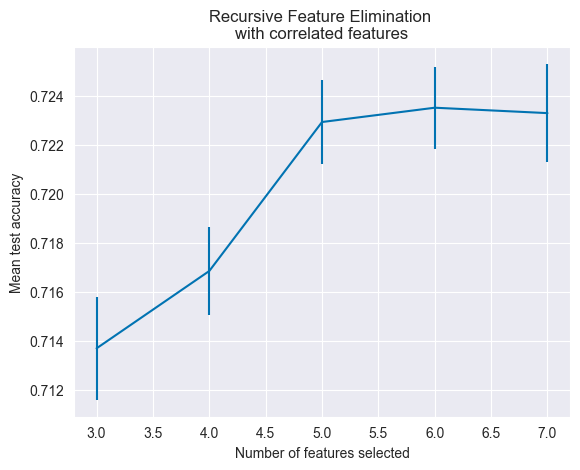


(+) Recursive feature elimination with cross-validation:

Optimal number of features: 6



,RFECV-Rank
Features,
age,1
bmi,1
ap_hi,1
cholesterol,1
gluc,1
lifestyle,1
gender,2



Execution time: 4.11 sec.



In [48]:

hml.my_rfecv(
    X_train_615,
    y_train_615,
    estimator=LGBMClassifier(),
    starkf_cv=5, scoring = 'f1_weighted', min_features_to_select=3,
    all_features = ascvd1_615_train.columns
)

#### (+) SHAP method

In [49]:

hml.my_shap_method(
    X_train_615,y_train_615, shap_model=LGBMClassifier(),
)

[LightGBM] [Info] Number of positive: 19731, number of negative: 20206
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 39937, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494053 -> initscore=-0.023789
[LightGBM] [Info] Start training from score -0.023789


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray



(+) SHAP method: Prediction Contribution and Error Contribution.



Contribution Train_Data                     
             Error_Rank Prediction     Error
ap_hi                 1   0.902496 -0.100377
age                   2   0.288867 -0.020466
cholesterol           3   0.206657 -0.011271
bmi                   4   0.112862 -0.008156
lifestyle             5   0.064874 -0.003033
gluc                  6   0.032276 -0.001367
gender                7   0.016933 -0.000771


Execution time: 2.3 sec.



#### (+) Feature selection  

The above results suit the exploratory analysis step results, so we select six features as input for the machine learning model, such as **'age', 'bmi', 'ap_hi', 'cholesterol', 'gluc', 'lifestyle'**.

In [50]:

# Drop 'gender' and check duplicates
ascvd1_615_train = hfc.my_drop_col_and_chk(
    ascvd1_615_train, drop_cols=[
        'gender'
        ], chkkind="without", chkcolumn=["cardio"], 
)

Drop columns done!

Duplicate values of dataframe:  20
Duplicate values of dataframe without ['cardio']: 30 



In [51]:

# Drop duplicates
ascvd1_615_train = hfc.my_drop_dup_and_chk(
    ascvd1_615_train, kind="without", subset_col=["cardio"], keep_occurrence=False
)


Drop duplicates done!
The dataframe contains 49892 rows after removing duplicates.


Duplicate values of dataframe:  0
Duplicate values of dataframe without ['cardio']: 0 



## 6.2. Modeling

### 6.2.1. Model selection

We will use K-Fold Cross-Validation for evaluating and selecting models. Besides, as our project is focused on constructing a model for disease prediction, we will be assessing model performance using the F1-measure (F1-score). A higher F1-score is indicative of a model that effectively balances precision and recall, making it an appropriate choice for medical diagnosis scenarios where false positives and false negatives can have serious consequences.

In [52]:

ascvd1_621_train = ascvd1_615_train.copy()

X_train_621, X_valid_621, y_train_621, y_valid_621 = hml.my_train_test_split(
    ascvd1_621_train,
    "cardio",
    test_size=0.2,
    random_state=81,
)


(+) Input - Output Separation:

X (input) dataset: 49892 rows x 6 columns.
 (['age', 'bmi', 'ap_hi', 'cholesterol', 'gluc', 'lifestyle'])
y (output) dataset: 49892 rows x 1 columns.
 (['cardio'])

(+) Data Splitting (with stratify parameter):

X_valid, y_valid: 9979 rows. Percentage of each class in y_test: {0: '51.0%', 1: '49.0%'}
X_train, y_train: 39913 rows. Percentage of each class in y_train: {0: '51.0%', 1: '49.0%'}


In [53]:

my_models = {
    1: sklen.RandomForestClassifier(),
    2: sklen.HistGradientBoostingClassifier(),
    3: sklen.GradientBoostingClassifier(),
    4: sklen.AdaBoostClassifier(),
    5: skltr.DecisionTreeClassifier(),
    6: XGBClassifier(),
    7: LGBMClassifier(),
}

hml.my_kfold_cross_valid(
    "ascvd1_621_train",
    input=X_train_621,
    output=y_train_621,
    n_splits=5,
    metric="f1_weighted",
    models=my_models
)


(+) K-Fold Cross-Validation (dataset: 'ascvd1_621_train')



,Metric,Mean,Errors,Rank
Algorithm,,,,
HistGradientBoostingClassifier,f1_weighted,0.729,0.007,1
GradientBoostingClassifier,f1_weighted,0.727,0.005,2
LGBMClassifier,f1_weighted,0.727,0.007,2
AdaBoostClassifier,f1_weighted,0.721,0.004,3
XGBClassifier,f1_weighted,0.720,0.004,4
RandomForestClassifier,f1_weighted,0.694,0.003,5
DecisionTreeClassifier,f1_weighted,0.629,0.004,6



Execution time: 11.9 sec.



We decide to choose the [**HistGradientBoostingClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html) model for the next step.

### 6.2.2. Model Building

#### (+) Build and run the model with default parameters on the training dataset

In [54]:

ascvd1_622_train = ascvd1_621_train.copy()

X_train_622, X_valid_622, y_train_622, y_valid_622 = hml.my_train_test_split(
    ascvd1_622_train,
    "cardio",
    test_size=0.2,
    random_state=2012,
)


(+) Input - Output Separation:

X (input) dataset: 49892 rows x 6 columns.
 (['age', 'bmi', 'ap_hi', 'cholesterol', 'gluc', 'lifestyle'])
y (output) dataset: 49892 rows x 1 columns.
 (['cardio'])

(+) Data Splitting (with stratify parameter):

X_valid, y_valid: 9979 rows. Percentage of each class in y_test: {0: '51.0%', 1: '49.0%'}
X_train, y_train: 39913 rows. Percentage of each class in y_train: {0: '51.0%', 1: '49.0%'}


'HistGradientBoostingClassifier Performance'

'ascvd1_622_train',Training Dataset,Testing Dataset,Diff
Metric (weighted),,,
Accuracy,0.737,0.727,0.010
Precision,0.737,0.728,0.009
Recall/Sensitivity,0.737,0.727,0.010
f1-score,0.736,0.727,0.009
Specificity,0.771,0.757,0.014



Execution time: 1.68 sec.



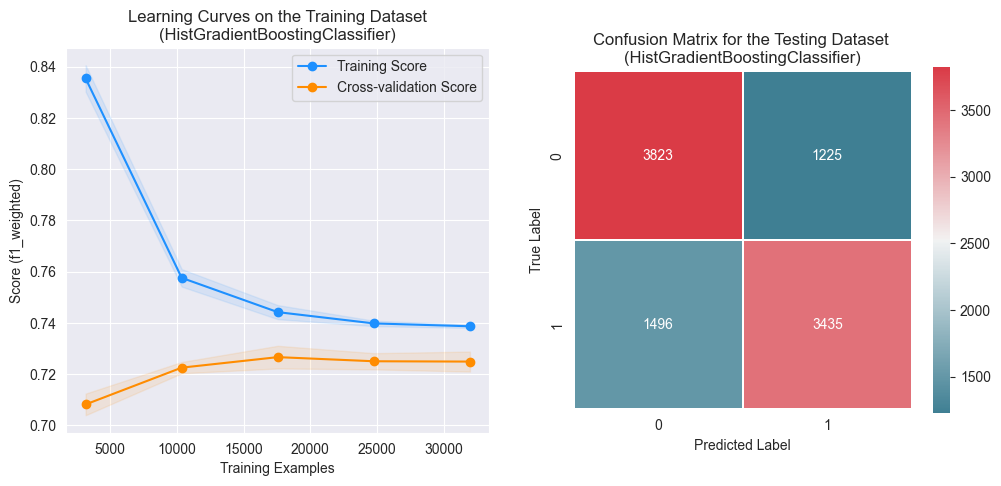

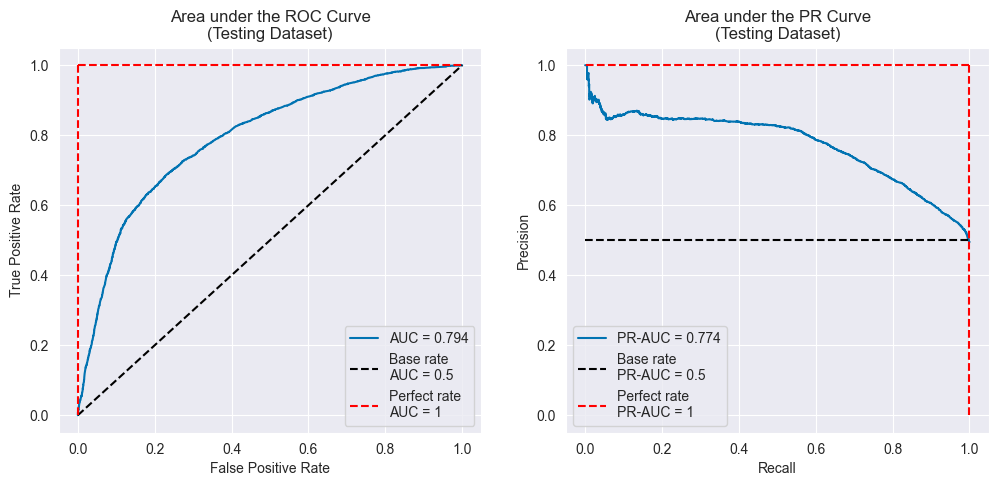

In [55]:

# ascvd1_622_train: ['age', 'bmi', 'ap_hi', 'cholesterol', 'gluc', 'lifestyle'] and ['cardio]
_, _ = hml.my_run_model_clf(
    "ascvd1_622_train",
    model=sklen.HistGradientBoostingClassifier(
        random_state=1981,
        categorical_features=[
            3,4,5
        ],
        class_weight='balanced'
    ),
    X_train=X_train_622,
    y_train=y_train_622,
    X_test=X_valid_622,
    y_test=y_valid_622,
    score_and_avg=['f1_weighted', 'weighted'],
    pos_label=1,
)

The learning curve shows that the model gives good predictions for training data but not for validation data since it cannot generalize and fits too closely to the training dataset instead (overfitting). We will try tuning this model using [HalvingGridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html) and [params](https://pydata.org/nyc2019/schedule/presentation/5/deep-dive-into-scikit-learns-histgradientboostingclassifier-and-regressor/) for a better performance.

#### (+) Improve Performance

In [56]:

_ = hml.my_run_halvgrid_search(
    estimator=sklen.HistGradientBoostingClassifier(
        random_state=1981, categorical_features=[3, 4, 5]
    ),
    params={
        "l2_regularization": [0.5, 2, 5],
        "class_weight": ["balanced"],
        "n_iter_no_change": [10],
        "learning_rate": [0.05, 0.5, 0.8],  # [0.1 (default), 0.5]
        "max_depth": [None, 3],  # [None, 3]
        "max_leaf_nodes": [100, 200],  # [31 (default), 200]
        "min_samples_leaf": [20],
        "max_iter": [50, 500, 1000],  # [100 (default), 500, 1000]
        "max_bins": [50, 100, 255],  # [50, 100, 150, 255 (default)]
    },
    cv=5,
    factor=2,
    scoring_metrics="f1_weighted",
    X_train=X_train_622,
    y_train=y_train_622,
)


 HistGradientBoostingClassifier(categorical_features=[3, 4, 5],
                               random_state=1981)
-------------------------------
   Best Score (f1_weighted): 0.722
   Best Parameters: 
      , class_weight= balanced
      , l2_regularization= 2
      , learning_rate= 0.05
      , max_bins= 100
      , max_depth= 3
      , max_iter= 50
      , max_leaf_nodes= 200
      , min_samples_leaf= 20
      , n_iter_no_change= 10

Execution time: 49.12 sec.



#### (+) Evalute model performance with new parameter

'HistGradientBoostingClassifier Performance'

'ascvd1_622_train',Training Dataset,Testing Dataset,Diff
Metric (weighted),,,
Accuracy,0.730,0.726,0.004
Precision,0.731,0.727,0.004
Recall/Sensitivity,0.730,0.726,0.004
f1-score,0.730,0.726,0.004
Specificity,0.759,0.752,0.007



Execution time: 2.17 sec.



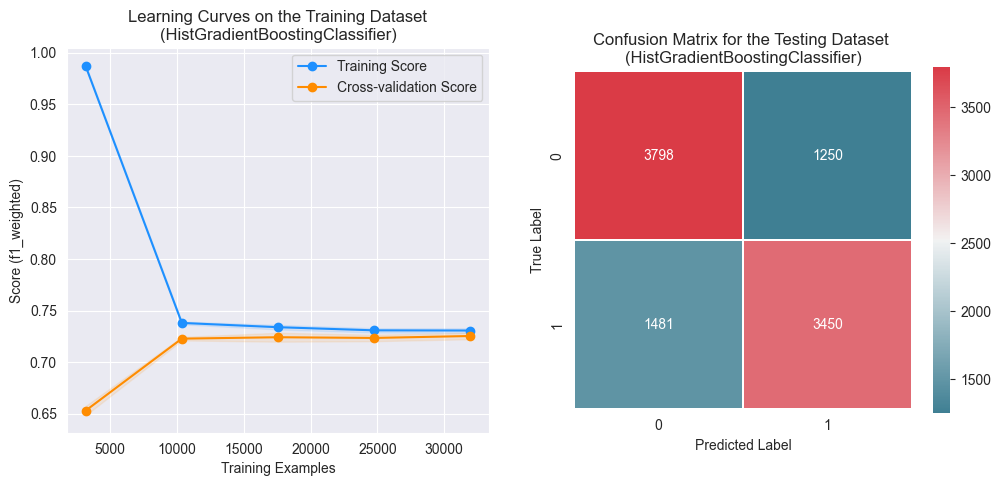

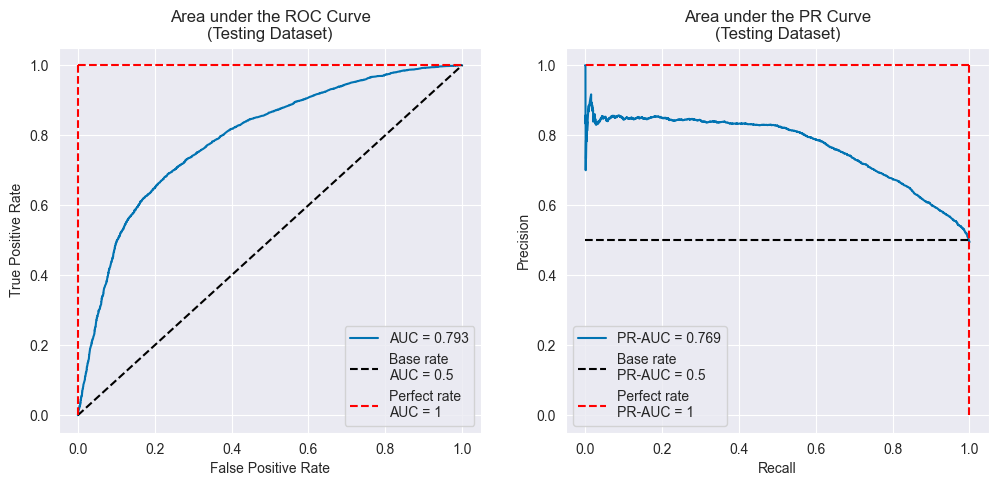

In [57]:

# ascvd1_622_train: ['age', 'bmi', 'ap_hi', 'cholesterol', 'gluc', 'lifestyle'] and ['cardio]
ascvd1_622_train_result, ascvd1_622_train_model = hml.my_run_model_clf(
    "ascvd1_622_train",
    model=sklen.HistGradientBoostingClassifier(
        random_state=1981,
        categorical_features=[
            3,4,5
        ]
        , class_weight= 'balanced'
        , l2_regularization= 0.5
        , learning_rate= 0.8
        , max_bins= 255
        , max_depth= 3
        , max_iter= 1000
        , max_leaf_nodes= 20
        , min_samples_leaf= 20
        , n_iter_no_change= 10
        , scoring='f1_weighted'
    ),
    X_train=X_train_622,
    y_train=y_train_622,
    X_test=X_valid_622,
    y_test=y_valid_622,
    score_and_avg=['f1_weighted', 'weighted'],
    pos_label=1,
)

After tuning the model, the learning curves confirm that it now performs well on both the training and validation data. This is reflected in the similar training and cross-validation scores, indicating good fitting. However, there are still other metrics that need to be improved. 

Because we cannot make further improvements to the model performance, we have decided to use this model to evaluate a new unseen dataset.

In [58]:

# import joblib
# # save the model to disk
# filename = 'ascvd_finalized_model.sav'
# joblib.dump(ascvd1_622_train_model, filename)

## 6.2.3. Unseen Data Prediction

In this step, we use the unseen dataset that we held back in Data Separation step above. An 'unseen dataset' refers to data that a machine learning model has not been trained on. This is a critical evaluation method that assesses the model's ability to generalize to new data.

In [59]:

ascvd1_623_unseen = ascvd1_612_unseen.copy()
ascvd1_623_unseen.sample(5)

,gender,age,bmi,ap_hi,cholesterol,gluc,lifestyle,cardio
7525,1,19150,27.407657,120,1,1,1,1
22533,1,21878,22.656250,120,1,1,1,0
21024,1,16810,18.552876,100,1,2,1,0
58078,1,16753,24.456063,120,1,1,1,0
53678,1,23399,38.156221,140,3,1,2,1


In [60]:

# Trafrom unseen dataset
# Drop 'gender' and check duplicates
ascvd1_623_unseen = hfc.my_drop_col_and_chk(
    ascvd1_623_unseen, drop_cols=['gender'], chkkind="without", chkcolumn=["cardio"], 
)
# Drop duplicates
ascvd1_623_unseen = hfc.my_drop_dup_and_chk(
    ascvd1_623_unseen, kind="without", subset_col=["cardio"], keep_occurrence=False
)
# Input - Output Separation
X_unseen_623, y_unseen_623 = hml.my_sep_feature_label(
    ascvd1_623_unseen,
    "cardio",
)

Drop columns done!

Duplicate values of dataframe:  0
Duplicate values of dataframe without ['cardio']: 2 


Drop duplicates done!
The dataframe contains 12479 rows after removing duplicates.


Duplicate values of dataframe:  0
Duplicate values of dataframe without ['cardio']: 0 


(+) Input - Output Separation:

X (input) dataset: 12479 rows x 6 columns.
 (['age', 'bmi', 'ap_hi', 'cholesterol', 'gluc', 'lifestyle'])
y (output) dataset: 12479 rows x 1 columns.
 (['cardio'])


'HistGradientBoostingClassifier Performance'

Metric (weighted),Accuracy,Precision,Recall/Sensitivity,f1-score,Specificity
Unseen Dataset (ascvd1_523_unseen),0.736,0.736,0.736,0.736,0.759


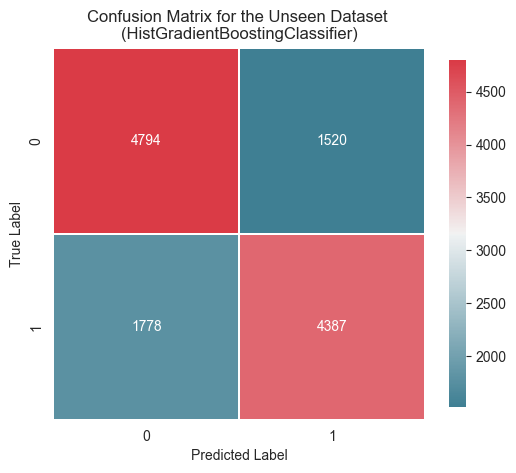

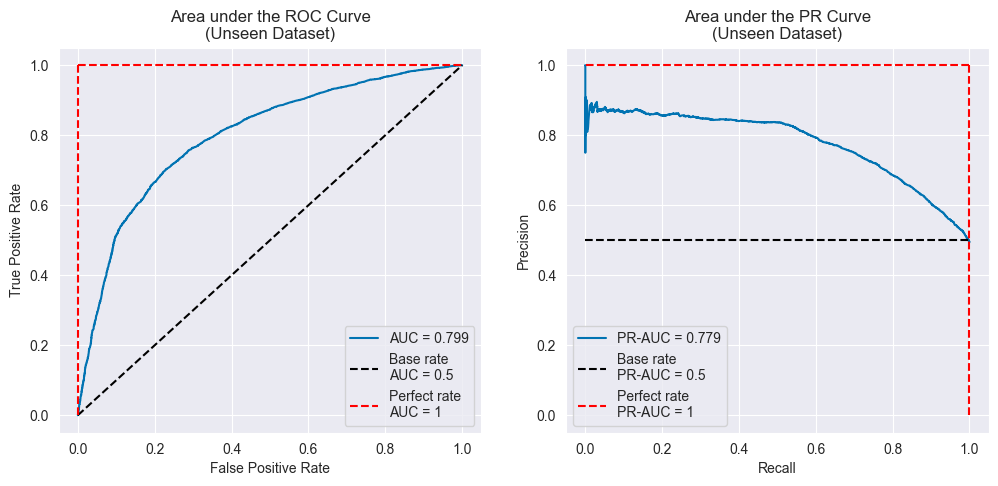

In [61]:

# load the model from disk
# ascvd1_622_train_model = joblib.load(filename)

# Evaluate trained model on unseen dataset
_,_ =hml.my_run_trained_model_clf(
    "ascvd1_523_unseen",
    trained_model=ascvd1_622_train_model,
    X_test=X_unseen_623,
    y_test=y_unseen_623,
    score_and_avg=['f1_weighted', 'weighted'],
    pos_label=1,
    
)

The above results indicate that the model performs well on the unseen dataset. All critical metrics such as Recall, Precision, F1-score are better (about 0.74). In medical diagnosis, a high Recall is desirable because it minimizes the chances of missing a disease or condition when it is present. Also, a higher F1-score indicates a model that balances Precision and Recall effectively, making it suitable for medical diagnosis scenarios where both false negatives and false positives can have severe consequences.

The ROC-AUC rating of 0.80 indicates the model's ability to differentiate well between positive and negative cases, implying good discriminative ability. Likewise, the PR-AUC rating of 0.78 suggests the model performs well in ranking positive cases. This metric measures the model’s precision (ability to avoid false positives) for different classification thresholds.

Overall, the machine learning model's performance on the unseen dataset is promising. It generalizes well to new data and achieves good accuracy, precision, recall, and F1-score. The confusion matrix and ROC/PR curves provide additional support for these findings.

# **7. Conclusion & Recommendations**

### (+) The impact of different factors on developing of cardiovascular disease  

In conclusion, the analysis of the dataset has provided valuable insights. Having metabolic syndrome, which includes at least three of the following: high blood pressure (hypertension), high levels of "bad" cholesterol, impaired fasting glucose (pre-diabetes) or diabetes, and obesity, can increase a person's risk for cardiovascular disease. However, a healthy lifestyle that involves regular physical activity and avoiding tobacco and alcohol can play an important role in decreasing the risk of developing cardiovascular disease, even if one has one of the metabolic syndrome diseases. Along with these factors, age is also a critical factor that plays a role in increasing the risk for cardiovascular disease.

### (+) Build a machine learning model to predict the presence or absence of cardiovascular disease using those features

We have developed a Hist Gradient Boosting Classifier model that has shown promising results on unseen datasets, scoring an F1-score of 0.74, ROC-AUC of 0.80, and PR-AUC of 0.78. 

To further enhance the performance of the model, we recommend trying out different methods and exploring new techniques. Additionally, building other models and comparing their performance can help identify the best model to use.